## <span style="color : #8470FF">***Les librairies***</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as stats
import statsmodels
#from statsmodels.stats.proportion import proportion_confint
#from sklearn import datasets
#import scipy
from scipy.stats import pearsonr 
from scipy.stats import norm
from scipy.stats import chi2_contingency

## <span style="color : #8470FF">***Des fonctions***</span>

### <span style="color : #FFA500">***Fonction qui permettra de tester si une cle est fiable***</span>

In [2]:
def testerCle(df, colonne):
    """Fonction qui prend en arguments un dataframe et la colonne qui composent la clé primaire à tester."""
    id_df = df[colonne]
    a = np.array(id_df)
    print ('Identifiants uniques:')
    u = np.unique(a)
    print (u)

    print ('\n')
    print ("Nombre d'identifiants uniques :")
    print (len(u))

    print ('\n')
    print ("Nombre d'éléments en double:")
    u,indices = np.unique(a,return_counts = True)
    print (np.sort(indices))

### <span style="color : #FFA500">***Fonction qui permettra de tester les valeurs uniques de chaque colonne***</span>

In [3]:
def valeursUniques(df):
    for colonne, contenu in df.items():
        print('Valeurs uniques pour', colonne, ':')
        print(np.sort(df[colonne].unique()))
        print ('\n')

### <span style="color : #FFA500">***Fonction qui permettra afficher le type de données et les valeurs nulles***</span>

In [4]:
def testerColonnes(df):
    tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'type de colonne'})
    tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'valeurs nulles'}))
    tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.
                         rename(index={0:'valeurs nulles (%)'}))
    print(tab_info)

In [5]:
def ageIntervale(age):
    if age<=20:
        return '[20 ans (moins de)]'
    elif age>=21 and age<=30:
        return '[21 - 30 ans]'
    elif age>=31 and age<=40:
        return '[31 - 40 ans]'
    elif age>=41 and age<=50:
        return '[41 - 50 ans]'
    elif age>=51 and age<=60:
        return '[51 - 60 ans]'
    elif age>=61 and age<=70:
        return '[61 - 70 ans]'
    elif age>=71:
        return '[71 ans (plus de)]'

## <span style="color : #8470FF">***Chargement et affichage des données***</span>
## <span style="color : #00BFFF">***Transactions.csv***</span>
* ### <span style="color : #20B2AA">***Nettoyage et préparation des fichiers***</span>

In [6]:
transactions_df =  pd.read_csv('transactions.csv', sep=',')
transactions_df

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


* ### <span style="color : #20B2AA">***Vérification du type de données et valeurs nulles***</span>

In [7]:
testerColonnes(transactions_df)

                   id_prod    date session_id client_id
type de colonne     object  object     object    object
valeurs nulles           0       0          0         0
valeurs nulles (%)     0.0     0.0        0.0       0.0


### <span style="color : #000000">**La colonne 'Date' n'est pas au bon format, par conséquent, nous procédons à la vérification de cette colonne**</span>

### <span style="color : #20B2AA">**Nous trions la colonne de date**</span>

In [8]:
np.sort(transactions_df['date'])[::-1]

array(['test_2021-03-01 02:30:02.237450',
       'test_2021-03-01 02:30:02.237449',
       'test_2021-03-01 02:30:02.237449', ...,
       '2021-03-01 00:02:38.311413', '2021-03-01 00:02:26.047414',
       '2021-03-01 00:01:07.843138'], dtype=object)

### <span style="color : #000000">**Certaines données ne contiennent pas de format de date, à la place, ils contiennent le nom 'test'**</span>

### <span style="color : #20B2AA">**On filtre les données contenant le nom 'test' dans la colonne date**</span>

In [9]:
test_transactions_df = transactions_df[transactions_df.date.str.contains('test')]
test_transactions_df

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


### <span style="color : #000000">**Il y a 200 données contenant le mot 'test' dans la colonne Date**</span>

### <span style="color : #20B2AA">**Nous vérifions les valeurs uniques dans le nouveau dataframe test_df**</span>

In [10]:
valeursUniques(test_transactions_df)

Valeurs uniques pour id_prod :
['T_0']


Valeurs uniques pour date :
['test_2021-03-01 02:30:02.237412' 'test_2021-03-01 02:30:02.237413'
 'test_2021-03-01 02:30:02.237414' 'test_2021-03-01 02:30:02.237415'
 'test_2021-03-01 02:30:02.237416' 'test_2021-03-01 02:30:02.237417'
 'test_2021-03-01 02:30:02.237418' 'test_2021-03-01 02:30:02.237419'
 'test_2021-03-01 02:30:02.237420' 'test_2021-03-01 02:30:02.237421'
 'test_2021-03-01 02:30:02.237422' 'test_2021-03-01 02:30:02.237423'
 'test_2021-03-01 02:30:02.237424' 'test_2021-03-01 02:30:02.237425'
 'test_2021-03-01 02:30:02.237426' 'test_2021-03-01 02:30:02.237427'
 'test_2021-03-01 02:30:02.237428' 'test_2021-03-01 02:30:02.237429'
 'test_2021-03-01 02:30:02.237430' 'test_2021-03-01 02:30:02.237431'
 'test_2021-03-01 02:30:02.237432' 'test_2021-03-01 02:30:02.237433'
 'test_2021-03-01 02:30:02.237434' 'test_2021-03-01 02:30:02.237435'
 'test_2021-03-01 02:30:02.237436' 'test_2021-03-01 02:30:02.237437'
 'test_2021-03-01 02:30:02.237438'

### <span style="color : #000000">**Toutes les données dans ses colonnes sont des données de test**</span>
### <span style="color : #000000">**On garde les identifiants (id_prod, client_id) pour pouvoir les filtrer dans les autres tables**</span>

### <span style="color : #20B2AA">**Nous créons un nouveau Dataframe 'transactions_final_df' avec uniquement les valeurs qui ne sont pas Test**</span>

In [11]:
transactions_final_df = transactions_df[transactions_df['session_id'] != 's_0'].copy()
transactions_final_df

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


### <span style="color : #20B2AA">**Nous changeons le type de la colonne de date par Datetime**</span>

In [12]:
transactions_final_df['date'] = pd.to_datetime(transactions_final_df['date'])
transactions_final_df

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


### <span style="color : #20B2AA">**Nous vérifions que le type de la colonne 'date' a été correctement modifié**</span>

In [13]:
testerColonnes(transactions_final_df)

                   id_prod            date session_id client_id
type de colonne     object  datetime64[ns]     object    object
valeurs nulles           0               0          0         0
valeurs nulles (%)     0.0             0.0        0.0       0.0


### <span style="color : #20B2AA">**On vérifie que les 4 colonnes sont uniques**</span>

In [14]:
transactions_final_df.drop_duplicates()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [15]:
transactions_final_df.nunique()

id_prod         3266
date          679332
session_id    342315
client_id       8600
dtype: int64

### <span style="color : #000000">**Aucune transaction en double trouvée ('679332' transactions comme avant)**</span>

* ### <span style="color : #20B2AA">***Correction du nom et de l'ordre des colonnes***</span>

In [16]:
transactions_final_df = transactions_final_df.rename(columns={'id_prod':'Id du produit', 'date':'Date de la transaction', 'session_id':'Id de session', 'client_id':'Id du client'})
transactions_final_df = transactions_final_df[['Id de session','Date de la transaction','Id du client','Id du produit']].copy()
transactions_final_df.sort_values(['Id de session', 'Date de la transaction'], ascending=[True, True])

,Id de session,Date de la transaction,Id du client,Id du produit
480642,s_1,2021-03-01 00:01:07.843138,c_329,0_1259
138915,s_10,2021-03-01 00:10:33.163037,c_2218,1_635
360110,s_100,2021-03-01 04:12:43.572994,c_3854,0_1030
578825,s_100,2021-03-01 04:43:58.025677,c_3854,0_1451
142862,s_1000,2021-03-03 02:38:09.568389,c_1014,0_1625
...,...,...,...,...
508968,s_99996,2021-10-04 18:58:49.228317,c_4900,0_1362
504526,s_99997,2021-10-04 18:45:38.003516,c_3521,0_1197
633558,s_99998,2021-10-04 18:45:54.374885,c_2795,0_1572
48865,s_99998,2021-10-04 18:50:59.099942,c_2795,0_1411


## <span style="color : #00BFFF">***Customers.csv***</span>
* ### <span style="color : #20B2AA">***Nettoyage et préparation des fichiers***</span>

In [17]:
customers_df =  pd.read_csv('customers.csv', sep=',')
customers_df

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


* ### <span style="color : #20B2AA">***Vérification du type de données et valeurs nulles***</span>

In [18]:
testerColonnes(customers_df)

                   client_id     sex  birth
type de colonne       object  object  int64
valeurs nulles             0       0      0
valeurs nulles (%)       0.0     0.0    0.0


### <span style="color : #20B2AA">**Nous vérifions les données de test que nous avons trouvées précédemment**</span>

In [19]:
customers_df.loc[customers_df['client_id'].isin(['ct_0','ct_1'])]

,client_id,sex,birth
2735,ct_0,f,2001
8494,ct_1,m,2001


### <span style="color : #000000">**Nous enlevons les deux données de notre DataFrame, car elles ne suivent pas le format du client_id**</span>

### <span style="color : #20B2AA">**Nous créons un nouveau Dataframe 'customers_final_df' avec uniquement les valeurs qui ne sont pas Test**</span>

In [20]:
customers_final_df = customers_df[~customers_df['client_id'].isin(['ct_0','ct_1'])].copy()
customers_final_df

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


* ### <span style="color : #20B2AA">***Vérification des valeurs uniques***</span>

In [21]:
valeursUniques(customers_final_df)

Valeurs uniques pour client_id :
['c_1' 'c_10' 'c_100' ... 'c_997' 'c_998' 'c_999']


Valeurs uniques pour sex :
['f' 'm']


Valeurs uniques pour birth :
[1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942
 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956
 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970
 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984
 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004]




### <span style="color : #000000">**Aucune valeur anormale trouvée**</span>

* ### <span style="color : #20B2AA">***Vérification de l'identifiant unique***</span>

In [22]:
testerCle(customers_final_df, 'client_id')

Identifiants uniques:
['c_1' 'c_10' 'c_100' ... 'c_997' 'c_998' 'c_999']


Nombre d'identifiants uniques :
8621


Nombre d'éléments en double:
[1 1 1 ... 1 1 1]


### <span style="color : #000000">**Tous les identifiants sont uniques**</span>

* ### <span style="color : #20B2AA">***Correction du nom et de l'ordre des colonnes***</span>

In [23]:
customers_final_df = customers_final_df.rename(columns={'client_id':'Id du client', 'sex':'Sexe', 'birth':'Année de naissance'}).copy()
customers_final_df.sort_values(['Id du client'], ascending=[True])

,Id du client,Sexe,Année de naissance
4299,c_1,m,1955
6894,c_10,m,1956
2137,c_100,m,1992
8472,c_1000,f,1966
3426,c_1001,m,1982
...,...,...,...
7004,c_995,m,1955
2788,c_996,f,1970
94,c_997,f,1994
2145,c_998,m,2001


## <span style="color : #00BFFF">***Products.csv***</span>
* ### <span style="color : #20B2AA">***Nettoyage et préparation des fichiers***</span>

In [24]:
products_df =  pd.read_csv('products.csv', sep=',')
products_df

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


* ### <span style="color : #20B2AA">***Vérification du type de données et valeurs nulles***</span>

In [25]:
testerColonnes(products_df)

                   id_prod    price  categ
type de colonne     object  float64  int64
valeurs nulles           0        0      0
valeurs nulles (%)     0.0      0.0    0.0


### <span style="color : #20B2AA">**Nous vérifions les données de test que nous avons trouvées précédemment**</span>

In [26]:
products_df.loc[products_df['id_prod'].isin(['T_0'])]

,id_prod,price,categ
731,T_0,-1.0,0


### <span style="color : #000000">**Nous supprimons cette valeur 'T_0' car la valeur d'un produit il n'est pas possible d'être négatif, de plus elle ne suit pas le même format que le 'id_prod'**</span>

### <span style="color : #20B2AA">**Nous créons un nouveau Dataframe 'products_final_df' avec uniquement les valeurs qui ne sont pas Test**</span>

In [27]:
products_final_df = products_df[products_df['id_prod']!= 'T_0'].copy()
products_final_df

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


* ### <span style="color : #20B2AA">***Vérification des valeurs uniques***</span>

In [28]:
valeursUniques(products_final_df)

Valeurs uniques pour id_prod :
['0_0' '0_1' '0_10' ... '2_97' '2_98' '2_99']


Valeurs uniques pour price :
[  0.62   0.66   0.77 ... 247.22 254.44 300.  ]


Valeurs uniques pour categ :
[0 1 2]




### <span style="color : #000000">**Aucune valeur anormale trouvée**</span>

* ### <span style="color : #20B2AA">***Vérification de l'identifiant unique***</span>

In [29]:
testerCle(products_final_df, 'id_prod')

Identifiants uniques:
['0_0' '0_1' '0_10' ... '2_97' '2_98' '2_99']


Nombre d'identifiants uniques :
3286


Nombre d'éléments en double:
[1 1 1 ... 1 1 1]


### <span style="color : #000000">**Tous les identifiants sont uniques**</span>

* ### <span style="color : #20B2AA">***Correction du nom et de l'ordre des colonnes***</span>

In [30]:
products_final_df = products_final_df.rename(columns={'id_prod':'Id du produit', 'price':'Prix du produit', 'categ':'Catégorie'}).copy()
products_final_df = products_final_df[['Id du produit','Catégorie','Prix du produit']].copy()
products_final_df.sort_values(['Id du produit'], ascending=[True])

,Id du produit,Catégorie,Prix du produit
1001,0_0,0,3.75
803,0_1,0,10.99
2691,0_10,0,17.95
663,0_100,0,20.60
922,0_1000,0,6.84
...,...,...,...
966,2_95,2,98.99
2576,2_96,2,47.91
2698,2_97,2,160.99
3088,2_98,2,149.74


## <span style="color : #8470FF">***Merge de les 3 DataFrames***</span>

* ### <span style="color : #20B2AA">***Merge entre 'transactions_final_df' et 'products_final_df'***</span>

In [31]:
merge_tr_pr = pd.merge(transactions_final_df, products_final_df, on='Id du produit', how='left')
merge_tr_pr

,Id de session,Date de la transaction,Id du client,Id du produit,Catégorie,Prix du produit
0,s_211425,2022-05-20 13:21:29.043970,c_103,0_1518,0.0,4.18
1,s_158752,2022-02-02 07:55:19.149409,c_8534,1_251,1.0,15.99
2,s_225667,2022-06-18 15:44:33.155329,c_6714,0_1277,0.0,7.99
3,s_52962,2021-06-24 04:19:29.835891,c_6941,2_209,2.0,69.99
4,s_325227,2023-01-11 08:22:08.194479,c_4232,0_1509,0.0,4.99
...,...,...,...,...,...,...
679327,s_150195,2022-01-15 13:05:06.246925,c_8489,0_1551,0.0,12.99
679328,s_181434,2022-03-19 16:03:23.429229,c_4370,1_639,1.0,10.99
679329,s_314704,2022-12-20 04:33:37.584749,c_304,0_1425,0.0,12.99
679330,s_63204,2021-07-16 20:36:35.350579,c_2227,0_1994,0.0,4.98


* ### <span style="color : #20B2AA">***Merge entre 'merge_tr_pr' et 'customers_final_df'***</span>

In [32]:
merge_final_df = pd.merge(merge_tr_pr, customers_final_df, on='Id du client', how='left')
merge_final_df = merge_final_df[['Id de session','Date de la transaction','Id du client','Année de naissance','Sexe','Id du produit','Catégorie','Prix du produit']].copy()
merge_final_df

,Id de session,Date de la transaction,Id du client,Année de naissance,Sexe,Id du produit,Catégorie,Prix du produit
0,s_211425,2022-05-20 13:21:29.043970,c_103,1986,f,0_1518,0.0,4.18
1,s_158752,2022-02-02 07:55:19.149409,c_8534,1988,m,1_251,1.0,15.99
2,s_225667,2022-06-18 15:44:33.155329,c_6714,1968,f,0_1277,0.0,7.99
3,s_52962,2021-06-24 04:19:29.835891,c_6941,2000,m,2_209,2.0,69.99
4,s_325227,2023-01-11 08:22:08.194479,c_4232,1980,m,0_1509,0.0,4.99
...,...,...,...,...,...,...,...,...
679327,s_150195,2022-01-15 13:05:06.246925,c_8489,1951,f,0_1551,0.0,12.99
679328,s_181434,2022-03-19 16:03:23.429229,c_4370,1977,f,1_639,1.0,10.99
679329,s_314704,2022-12-20 04:33:37.584749,c_304,1988,f,0_1425,0.0,12.99
679330,s_63204,2021-07-16 20:36:35.350579,c_2227,1986,m,0_1994,0.0,4.98


* ### <span style="color : #20B2AA">***Vérification du type de données et valeurs nulles***</span>

In [33]:
testerColonnes(merge_final_df)

                   Id de session Date de la transaction Id du client  \
type de colonne           object         datetime64[ns]       object   
valeurs nulles                 0                      0            0   
valeurs nulles (%)           0.0                    0.0          0.0   

                   Année de naissance    Sexe Id du produit Catégorie  \
type de colonne                 int64  object        object   float64   
valeurs nulles                      0       0             0       221   
valeurs nulles (%)                0.0     0.0           0.0  0.032532   

                   Prix du produit  
type de colonne            float64  
valeurs nulles                 221  
valeurs nulles (%)        0.032532  


### <span style="color : #000000">**Trouvé 221 valeurs nulles après avoir effectué le merge final**</span>

### <span style="color : #20B2AA">**Nous vérifions les valeurs nulles**</span>

In [34]:
no_id_produit = merge_final_df.loc[merge_final_df['Catégorie'].isnull(),:].copy()
no_id_produit.sort_values(['Id de session'], ascending=[True])

,Id de session,Date de la transaction,Id du client,Année de naissance,Sexe,Id du produit,Catégorie,Prix du produit
586571,s_100047,2021-10-04 21:20:27.540982,c_8138,1984,f,0_2245,NaN,NaN
441767,s_10427,2021-03-23 15:57:44.266387,c_5869,1952,f,0_2245,NaN,NaN
541186,s_105069,2021-10-15 09:31:31.539354,c_4188,1935,f,0_2245,NaN,NaN
281473,s_106841,2021-10-19 00:28:01.920054,c_3953,1984,f,0_2245,NaN,NaN
264442,s_107022,2021-10-19 09:32:03.667461,c_6128,1986,m,0_2245,NaN,NaN
...,...,...,...,...,...,...,...,...
622571,s_92049,2021-09-19 03:08:45.918021,c_4935,1982,f,0_2245,NaN,NaN
417648,s_94139,2021-09-23 07:22:38.636773,c_4746,1940,m,0_2245,NaN,NaN
173798,s_95396,2021-09-25 17:07:45.271509,c_8616,1984,m,0_2245,NaN,NaN
457929,s_95930,2021-09-26 17:52:55.561657,c_6990,1986,f,0_2245,NaN,NaN


### <span style="color : #20B2AA">**Nous vérifions combien de produits uniques n'ont pas été trouvés après le merge**</span>

In [35]:
print(no_id_produit['Id du produit'].unique())

['0_2245']


### <span style="color : #000000">**Un seul ID de produit trouvé '0_2245'**</span>

### <span style="color : #FFA500">**Nous allons créer deux DataFrame:**</span>
* ### <span style="color : #FFA500">***Une sans inclure ce produit '0_2245'***</span>
* ### <span style="color : #FFA500">***Une autre donnant une valeur hypothétique à ce produit pour la catégorie et le prix***</span>

### <span style="color : #20B2AA">**Nous créons un nouveau Dataframe 'merge_final_sid_df' sans compter l'identifiant Id du produit = '0_2245'**</span>

In [36]:
merge_final_sid_df = merge_final_df[merge_final_df['Id du produit'] != '0_2245'].copy()
merge_final_sid_df

,Id de session,Date de la transaction,Id du client,Année de naissance,Sexe,Id du produit,Catégorie,Prix du produit
0,s_211425,2022-05-20 13:21:29.043970,c_103,1986,f,0_1518,0.0,4.18
1,s_158752,2022-02-02 07:55:19.149409,c_8534,1988,m,1_251,1.0,15.99
2,s_225667,2022-06-18 15:44:33.155329,c_6714,1968,f,0_1277,0.0,7.99
3,s_52962,2021-06-24 04:19:29.835891,c_6941,2000,m,2_209,2.0,69.99
4,s_325227,2023-01-11 08:22:08.194479,c_4232,1980,m,0_1509,0.0,4.99
...,...,...,...,...,...,...,...,...
679327,s_150195,2022-01-15 13:05:06.246925,c_8489,1951,f,0_1551,0.0,12.99
679328,s_181434,2022-03-19 16:03:23.429229,c_4370,1977,f,1_639,1.0,10.99
679329,s_314704,2022-12-20 04:33:37.584749,c_304,1988,f,0_1425,0.0,12.99
679330,s_63204,2021-07-16 20:36:35.350579,c_2227,1986,m,0_1994,0.0,4.98


### <span style="color : #20B2AA">**Nous recherchons les valeurs pour créer les données manquantes pour le produit**</span>

In [37]:
for catg in [0, 1, 2]:
    print (products_final_df.loc[products_final_df['Catégorie'] == catg].head(5))

  Id du produit  Catégorie  Prix du produit
0        0_1421          0            19.99
1        0_1368          0             5.13
2         0_731          0            17.99
4        0_1507          0             3.99
5        0_1163          0             9.99
   Id du produit  Catégorie  Prix du produit
3          1_587          1             4.99
6          1_463          1            36.99
11         1_178          1            51.92
12         1_143          1             9.99
13         1_314          1             9.00
   Id du produit  Catégorie  Prix du produit
10         2_228          2           225.17
38         2_100          2            72.11
64          2_89          2           107.99
73         2_225          2           157.99
79         2_187          2           157.99


### <span style="color : #000000">**Nous observons que chaque identifiant de produit commence par le code de catégorie, nous concluons donc que notre produit '0_2245' doit appartenir à la catégorie '0'**</span>

### <span style="color : #20B2AA">**Nous recherchons un moyen d'attribuer une valeur à ce produit, en utilisant uniquement les données de la catégorie 0**</span>

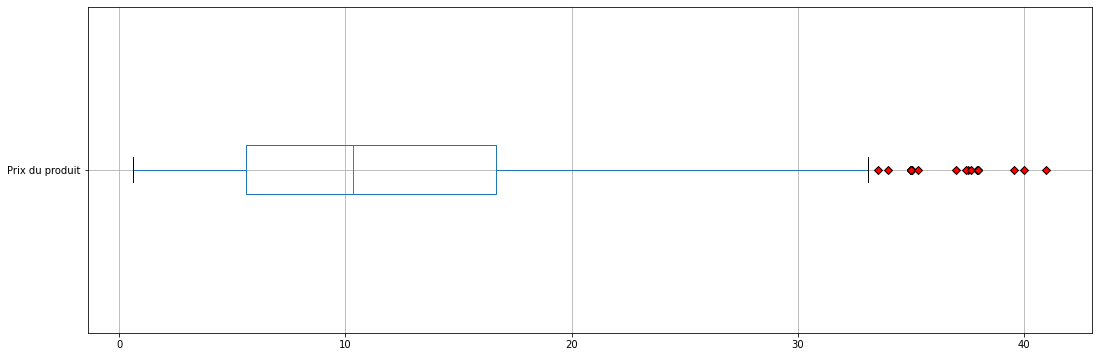

In [38]:
catg0_df = products_final_df.loc[products_final_df['Catégorie'] == 0]
green_diamond = dict(markerfacecolor='r', marker='D')
catg0_df.boxplot(column="Prix du produit", figsize = (18,6), flierprops=green_diamond, vert=False)
plt.xticks([0,10,20,30,40])
plt.show()

### <span style="color : #000000">**On calcule sa Moyenne, sa Médiane et son Mode**</span>

In [39]:
print("La moyenne:\n", catg0_df['Prix du produit'].mean())
print("La médiane:\n", catg0_df['Prix du produit'].median())
print("Le mode est:\n", catg0_df['Prix du produit'].mode())

La moyenne:
 11.732794627383296
La médiane:
 10.32
Le mode est:
 0    4.99
dtype: float64


### <span style="color : #000000">**J'ai décidé de lui attribuer la valeur de sa moyenne '11.73'**</span>

### <span style="color : #20B2AA">**Je leur donne les valeurs hypothétiques**</span>

In [40]:
merge_final_aid_df = merge_final_df.copy()
merge_final_aid_df.loc[merge_final_aid_df['Id du produit']=='0_2245','Catégorie']='0'
merge_final_aid_df.loc[merge_final_aid_df['Id du produit']=='0_2245','Prix du produit']= 11.73
merge_final_aid_df

,Id de session,Date de la transaction,Id du client,Année de naissance,Sexe,Id du produit,Catégorie,Prix du produit
0,s_211425,2022-05-20 13:21:29.043970,c_103,1986,f,0_1518,0.0,4.18
1,s_158752,2022-02-02 07:55:19.149409,c_8534,1988,m,1_251,1.0,15.99
2,s_225667,2022-06-18 15:44:33.155329,c_6714,1968,f,0_1277,0.0,7.99
3,s_52962,2021-06-24 04:19:29.835891,c_6941,2000,m,2_209,2.0,69.99
4,s_325227,2023-01-11 08:22:08.194479,c_4232,1980,m,0_1509,0.0,4.99
...,...,...,...,...,...,...,...,...
679327,s_150195,2022-01-15 13:05:06.246925,c_8489,1951,f,0_1551,0.0,12.99
679328,s_181434,2022-03-19 16:03:23.429229,c_4370,1977,f,1_639,1.0,10.99
679329,s_314704,2022-12-20 04:33:37.584749,c_304,1988,f,0_1425,0.0,12.99
679330,s_63204,2021-07-16 20:36:35.350579,c_2227,1986,m,0_1994,0.0,4.98


## <center><span style="color : #32CD32">**CALCUL DES CHIFFRE D'AFFAIRES**</span>

### <span style="color : #FF4500">**Total de chiffres d'affaires sans compter l'identifiant Id du produit = '0_2245'**</span>

In [41]:
total_chiffres_sid = merge_final_sid_df["Prix du produit"].sum()
print("Le total du chiffre d'affaires est de:", f"{total_chiffres_sid:,}")

Le total du chiffre d'affaires est de: 11,853,728.68


### <span style="color : #FF4500">**Total de chiffres d'affaires avec la valeur hypothétique générée pour le Id du produit = '0_2245'**</span>

In [42]:
total_chiffres_aid = merge_final_aid_df["Prix du produit"].sum()
print("Le total du chiffre d'affaires est de:", f"{total_chiffres_aid:,}")

Le total du chiffre d'affaires est de: 11,856,321.01


### <span style="color : #000000">**Comme nous le voyons, nos chiffres d'affaires ont augmenté en '2592.33' si nous attribuons la valeur hypothétique**</span>

### <span style="color : #20B2AA">**Préparation du DF**</span>

In [43]:
dates_merge_final_df = merge_final_aid_df.copy()
dates_merge_final_df

,Id de session,Date de la transaction,Id du client,Année de naissance,Sexe,Id du produit,Catégorie,Prix du produit
0,s_211425,2022-05-20 13:21:29.043970,c_103,1986,f,0_1518,0.0,4.18
1,s_158752,2022-02-02 07:55:19.149409,c_8534,1988,m,1_251,1.0,15.99
2,s_225667,2022-06-18 15:44:33.155329,c_6714,1968,f,0_1277,0.0,7.99
3,s_52962,2021-06-24 04:19:29.835891,c_6941,2000,m,2_209,2.0,69.99
4,s_325227,2023-01-11 08:22:08.194479,c_4232,1980,m,0_1509,0.0,4.99
...,...,...,...,...,...,...,...,...
679327,s_150195,2022-01-15 13:05:06.246925,c_8489,1951,f,0_1551,0.0,12.99
679328,s_181434,2022-03-19 16:03:23.429229,c_4370,1977,f,1_639,1.0,10.99
679329,s_314704,2022-12-20 04:33:37.584749,c_304,1988,f,0_1425,0.0,12.99
679330,s_63204,2021-07-16 20:36:35.350579,c_2227,1986,m,0_1994,0.0,4.98


In [44]:
dates_merge_final_df['Date'] = pd.to_datetime(dates_merge_final_df['Date de la transaction'].astype(str).apply(lambda x: x.split(' ')[0]))
dates_merge_final_df['Temps'] = dates_merge_final_df['Date de la transaction'].dt.to_period('M')
dates_merge_final_df['Catégorie'] = dates_merge_final_df['Catégorie'].astype(int)
dates_merge_final_df['Âge'] = (pd.DatetimeIndex(dates_merge_final_df['Date de la transaction']).year - dates_merge_final_df['Année de naissance'])
dates_merge_final_df

,Id de session,Date de la transaction,Id du client,Année de naissance,Sexe,Id du produit,Catégorie,Prix du produit,Date,Temps,Âge
0,s_211425,2022-05-20 13:21:29.043970,c_103,1986,f,0_1518,0,4.18,2022-05-20,2022-05,36
1,s_158752,2022-02-02 07:55:19.149409,c_8534,1988,m,1_251,1,15.99,2022-02-02,2022-02,34
2,s_225667,2022-06-18 15:44:33.155329,c_6714,1968,f,0_1277,0,7.99,2022-06-18,2022-06,54
3,s_52962,2021-06-24 04:19:29.835891,c_6941,2000,m,2_209,2,69.99,2021-06-24,2021-06,21
4,s_325227,2023-01-11 08:22:08.194479,c_4232,1980,m,0_1509,0,4.99,2023-01-11,2023-01,43
...,...,...,...,...,...,...,...,...,...,...,...
679327,s_150195,2022-01-15 13:05:06.246925,c_8489,1951,f,0_1551,0,12.99,2022-01-15,2022-01,71
679328,s_181434,2022-03-19 16:03:23.429229,c_4370,1977,f,1_639,1,10.99,2022-03-19,2022-03,45
679329,s_314704,2022-12-20 04:33:37.584749,c_304,1988,f,0_1425,0,12.99,2022-12-20,2022-12,34
679330,s_63204,2021-07-16 20:36:35.350579,c_2227,1986,m,0_1994,0,4.98,2021-07-16,2021-07,35


### <span style="color : #20B2AA">**Nous calculons le nombre de clients par âge**</span>

In [45]:
client_par_âge = dates_merge_final_df[['Id du client','Âge','Sexe']].sort_values(["Id du client", "Âge"], ascending= (True, True)).copy()
client_par_âge = client_par_âge.drop_duplicates(subset=['Id du client'], keep="last")
client_par_âge.sort_values("Âge", ascending=True)
client_par_âge = client_par_âge.groupby(['Âge','Sexe']).size().reset_index(name='Quantité de personnes')
client_par_âge

,Âge,Sexe,Quantité de personnes
0,17,f,2
1,17,m,4
2,18,f,65
3,18,m,47
4,19,f,188
...,...,...,...
150,92,m,2
151,93,f,2
152,93,m,1
153,94,f,1


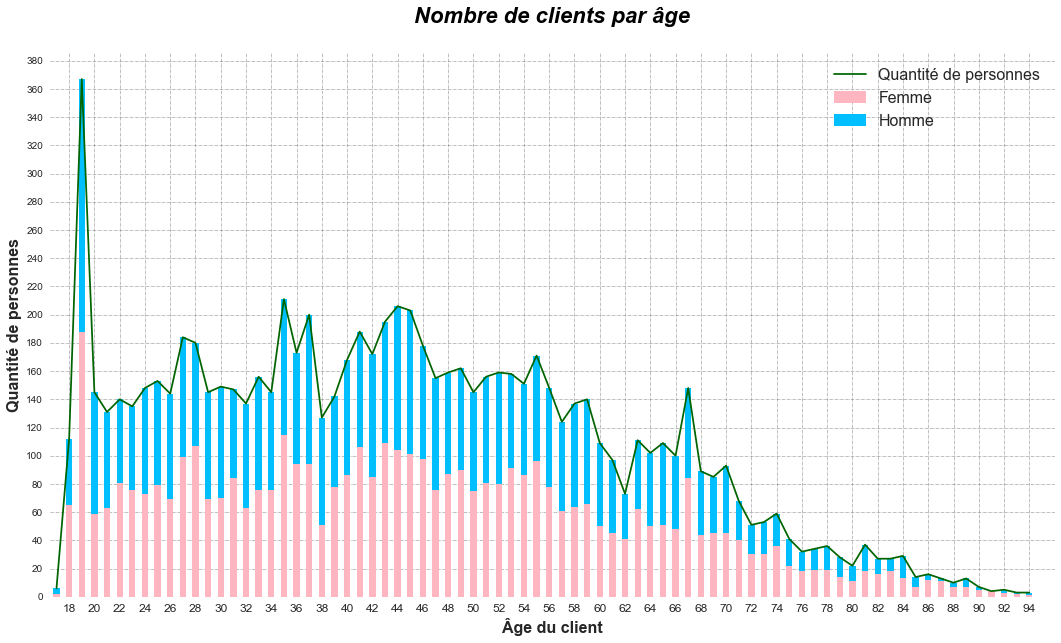

In [46]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (18,10))
ax.set_title("Nombre de clients par âge",
 fontsize=22, weight='bold',color='Black',style='italic',loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')

client_par_âge.groupby(['Âge']).sum().unstack().plot(kind='line', 
                        y = 'Quantité de personnes', ax=ax, stacked=True, figsize = (18,10),
                        color=['Darkgreen']).get_xaxis().set_visible(False)

client_par_âge.groupby(['Âge','Sexe']).sum().unstack().plot(kind='bar', 
                        y = 'Quantité de personnes', ax=ax, stacked=True, figsize = (18,10),
                        color=['lightpink', 'deepskyblue']).get_xaxis().set_visible(True)

plt.legend(('Quantité de personnes', 'Femme','Homme'), loc="upper right", fontsize=16)

plt.ylabel("Quantité de personnes", weight='bold', size=16)
plt.xlabel("Âge du client", weight='bold', size=16)

plt.xticks(np.arange(1, 80, 2))
plt.yticks(np.arange(0, 400, 20))

plt.xticks(rotation=0, fontsize=12)
plt.show()

### <span style="color : #000000">**Nous pouvons voir que la plupart de nos clients ont 19 ans, et on voit aussi que les Femmes sont plus que les Hommes en quantité**</span>

### <span style="color : #000000">**Nous créons la "Tranche d'âge" afin que nous puissions l'utiliser dans nos demandes**</span>

In [47]:
client_par_âge['Tranche âge'] = client_par_âge['Âge'].apply(ageIntervale)
client_par_âge.groupby(['Tranche âge'])['Quantité de personnes'].sum().reset_index()

,Tranche âge,Quantité de personnes
0,[20 ans (moins de)],630
1,[21 - 30 ans],1509
2,[31 - 40 ans],1606
3,[41 - 50 ans],1763
4,[51 - 60 ans],1453
5,[61 - 70 ans],1007
6,[71 ans (plus de)],632


### <span style="color : #20B2AA">**Nous ajoutons la "Tranche âge" à notre DataFrame final**</span>

In [48]:
dates_merge_final_df['Tranche âge'] = dates_merge_final_df['Âge'].apply(ageIntervale)
dates_merge_final_df = dates_merge_final_df[['Id de session','Date de la transaction','Date','Temps','Id du client','Année de naissance','Âge','Tranche âge','Sexe','Id du produit','Catégorie','Prix du produit']].copy()
dates_merge_final_df

,Id de session,Date de la transaction,Date,Temps,Id du client,Année de naissance,Âge,Tranche âge,Sexe,Id du produit,Catégorie,Prix du produit
0,s_211425,2022-05-20 13:21:29.043970,2022-05-20,2022-05,c_103,1986,36,[31 - 40 ans],f,0_1518,0,4.18
1,s_158752,2022-02-02 07:55:19.149409,2022-02-02,2022-02,c_8534,1988,34,[31 - 40 ans],m,1_251,1,15.99
2,s_225667,2022-06-18 15:44:33.155329,2022-06-18,2022-06,c_6714,1968,54,[51 - 60 ans],f,0_1277,0,7.99
3,s_52962,2021-06-24 04:19:29.835891,2021-06-24,2021-06,c_6941,2000,21,[21 - 30 ans],m,2_209,2,69.99
4,s_325227,2023-01-11 08:22:08.194479,2023-01-11,2023-01,c_4232,1980,43,[41 - 50 ans],m,0_1509,0,4.99
...,...,...,...,...,...,...,...,...,...,...,...,...
679327,s_150195,2022-01-15 13:05:06.246925,2022-01-15,2022-01,c_8489,1951,71,[71 ans (plus de)],f,0_1551,0,12.99
679328,s_181434,2022-03-19 16:03:23.429229,2022-03-19,2022-03,c_4370,1977,45,[41 - 50 ans],f,1_639,1,10.99
679329,s_314704,2022-12-20 04:33:37.584749,2022-12-20,2022-12,c_304,1988,34,[31 - 40 ans],f,0_1425,0,12.99
679330,s_63204,2021-07-16 20:36:35.350579,2021-07-16,2021-07,c_2227,1986,35,[31 - 40 ans],m,0_1994,0,4.98


## <center><span style="color : #32CD32">**DIFFÉRENTS INDICATEURS ET GRAPHIQUES AUTOUR DU CHIFFRE D'AFFAIRES**</span>

### <span style="color : #20B2AA">**Chiffre d'affaires dans le temps (Mois - Année)**</span>

In [49]:
chiffres_dans_temps = dates_merge_final_df.groupby(['Temps'])['Prix du produit'].sum().reset_index()
chiffres_dans_temps['Temps'] = chiffres_dans_temps['Temps'].astype(str)
chiffres_dans_temps.head(5)

,Temps,Prix du produit
0,2021-03,482546.18
1,2021-04,476273.52
2,2021-05,493037.31
3,2021-06,484170.67
4,2021-07,482882.32


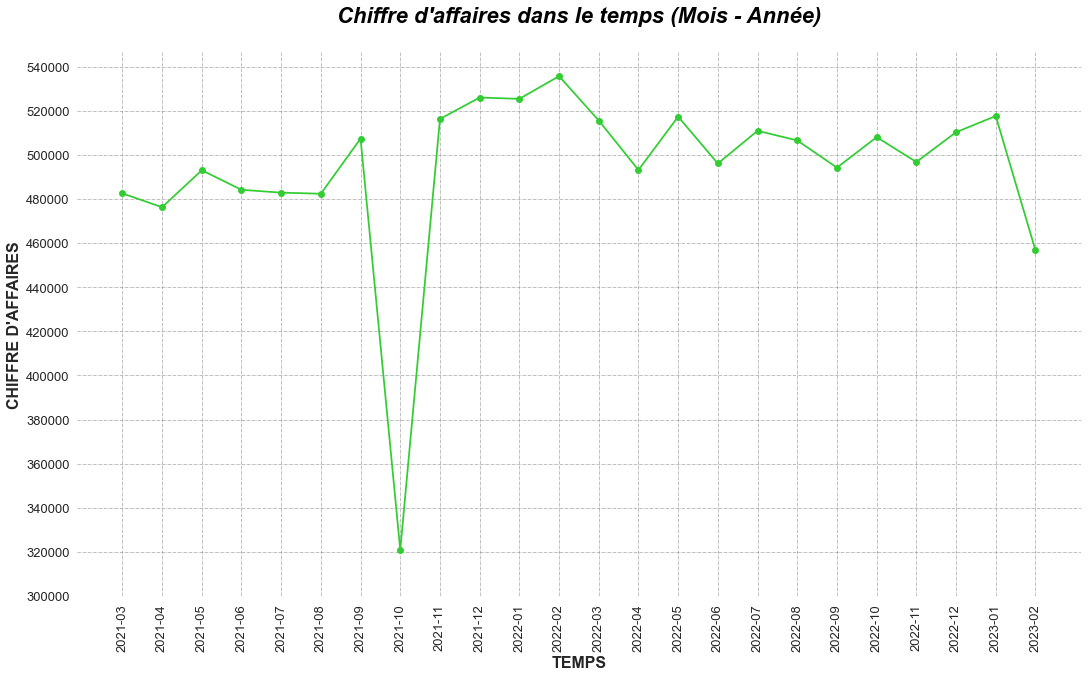

In [50]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (18,10))
ax.set_title("Chiffre d'affaires dans le temps (Mois - Année)",
 fontsize=22, weight='bold',color='Black',style='italic',loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
plt.plot(chiffres_dans_temps['Temps'], chiffres_dans_temps['Prix du produit'].values, c='limegreen', marker = 'o')
plt.xticks(rotation=90, fontsize=13)
plt.ylabel("CHIFFRE D'AFFAIRES",weight='bold',size=16)
plt.xlabel("TEMPS",weight='bold',size=16)
plt.yticks(np.arange(300000, 550000, 20000), fontsize=13)
plt.show()

### <span style="color : #000000">**Une forte baisse est observée au mois d'octobre 2021**</span>

### <span style="color : #20B2AA">**Chiffre d'affaires dans le temps par Jour**</span>

In [51]:
chiffres_par_jour = dates_merge_final_df.groupby(['Date'])['Prix du produit'].sum().reset_index()
chiffres_par_jour

,Date,Prix du produit
0,2021-03-01,16576.95
1,2021-03-02,15498.18
2,2021-03-03,15198.69
3,2021-03-04,15196.07
4,2021-03-05,17471.37
...,...,...
725,2023-02-24,15207.89
726,2023-02-25,15761.25
727,2023-02-26,16304.72
728,2023-02-27,19170.81


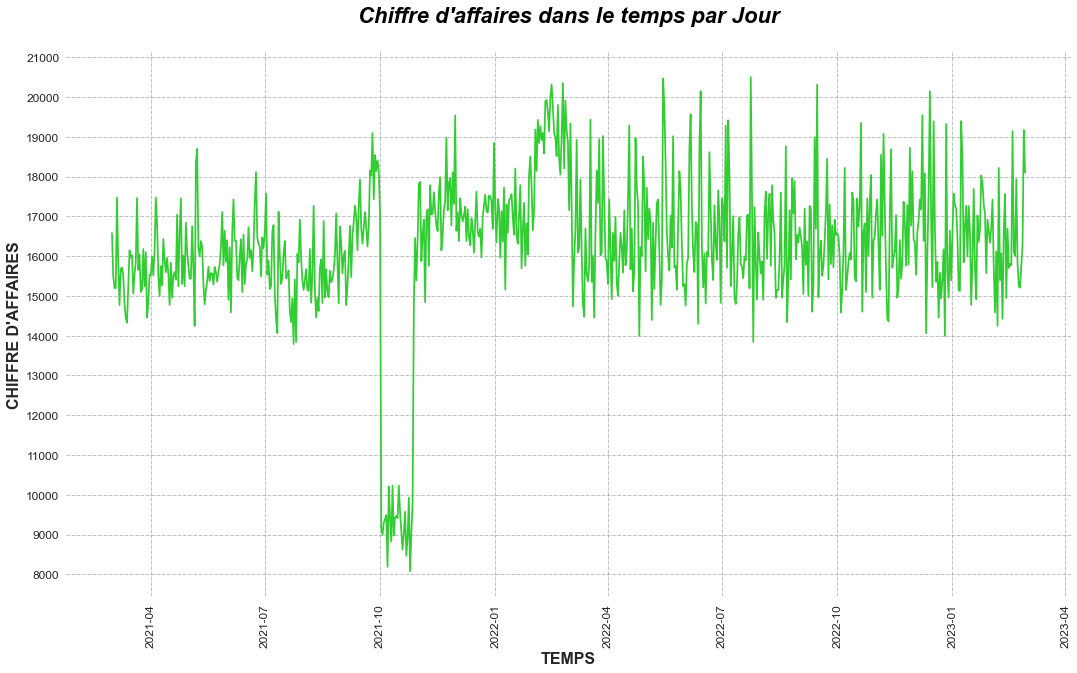

In [52]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (18,10))
ax.set_title("Chiffre d'affaires dans le temps par Jour",
 fontsize=22, weight='bold',color='Black',style='italic',loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
plt.plot(chiffres_par_jour['Date'], chiffres_par_jour['Prix du produit'].values, c='limegreen')
plt.xticks(rotation=90, fontsize=12)
plt.ylabel("CHIFFRE D'AFFAIRES",weight='bold',size=16)
plt.xlabel("TEMPS",weight='bold',size=16)
plt.yticks(np.arange(8000, 22000, 1000), fontsize=12)
plt.show()

### <span style="color : #20B2AA">**Nous calculons les chiffre d'affaires pour le mois d'octobre 2021 uniquement**</span>

In [53]:
chiffres_octubre_2021 = dates_merge_final_df.groupby(['Date','Catégorie'])['Prix du produit'].sum().reset_index()
mask_octubre_2021 = (chiffres_octubre_2021['Date'] >= '2021-10-1') & (chiffres_octubre_2021['Date'] <= '2021-10-31')
chiffres_octubre_2021=chiffres_octubre_2021.loc[mask_octubre_2021]
chiffres_octubre_2021['Date'] = chiffres_octubre_2021['Date'].astype(str)
chiffres_octubre_2021

,Date,Catégorie,Prix du produit
642,2021-10-01,0,6950.50
643,2021-10-01,1,7003.79
644,2021-10-01,2,3104.05
645,2021-10-02,0,7141.01
646,2021-10-02,2,2041.12
...,...,...,...
704,2021-10-30,1,6753.69
705,2021-10-30,2,2898.47
706,2021-10-31,0,5924.07
707,2021-10-31,1,7261.67


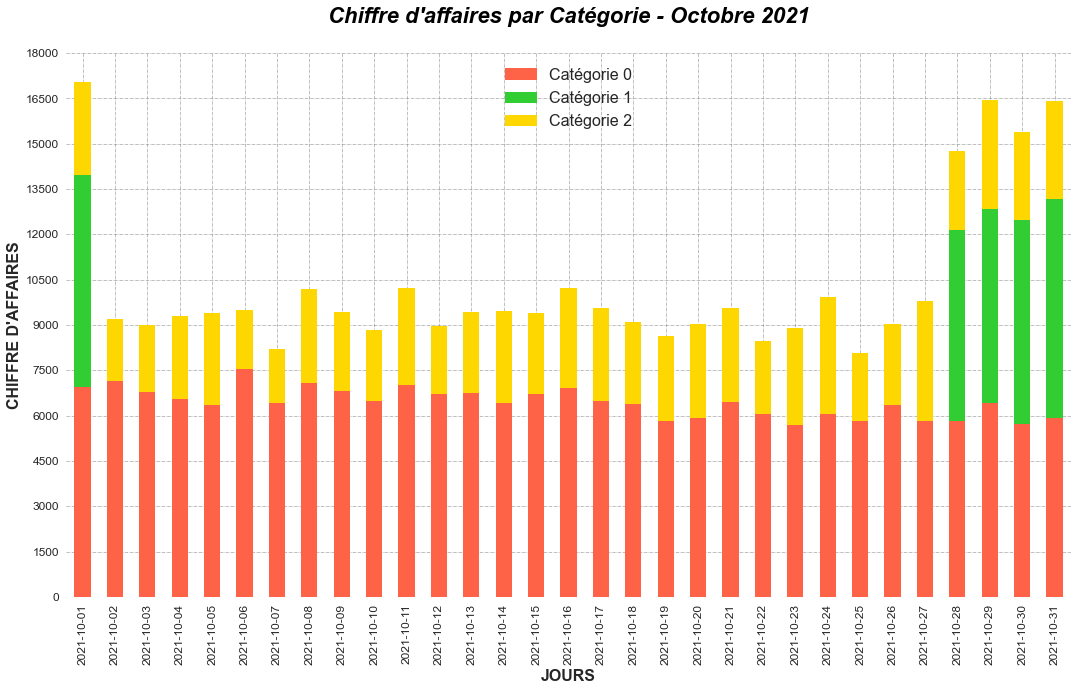

In [54]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (18,10))
ax.set_title("Chiffre d'affaires par Catégorie - Octobre 2021",
 fontsize=22, weight='bold',color='Black',style='italic',loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')

chiffres_octubre_2021.groupby(['Date','Catégorie']).sum().unstack().plot(kind='bar', 
                        y = 'Prix du produit',  ax=ax, stacked=True, figsize = (18,10), 
                        color=['tomato', 'limegreen', 'gold'])

plt.legend(('Catégorie 0', 'Catégorie 1','Catégorie 2'), loc="upper center", fontsize=16)

plt.ylabel("CHIFFRE D'AFFAIRES", weight='bold', size=16)
plt.xlabel("JOURS", weight='bold', size=16)
plt.yticks(np.arange(0, 19000, 1500), fontsize=12)
plt.xticks(rotation=90, fontsize=12)
plt.show()

### <span style="color : #000000">**Comme on peut le voir sur le graphique, il y a des jours (du 2 octobre au 27 octobre) où nous n'avons aucune valeur dans la "Catégorie 1", cela est peut-être dû à une erreur, mais cela pose un gros problème car il ne représente pas les données réelles**</span>

### <span style="color : #000000">**Nous avons décidé de ne pas considérer le mois d'Octobre-2021 dans nos analyses car il ne représente pas de vraies données**</span>

In [55]:
dataframe_Final = dates_merge_final_df.copy()
dataframe_Final = dataframe_Final.drop(index=dataframe_Final[dataframe_Final['Temps'] == '2021-10'].index)
dataframe_Final

,Id de session,Date de la transaction,Date,Temps,Id du client,Année de naissance,Âge,Tranche âge,Sexe,Id du produit,Catégorie,Prix du produit
0,s_211425,2022-05-20 13:21:29.043970,2022-05-20,2022-05,c_103,1986,36,[31 - 40 ans],f,0_1518,0,4.18
1,s_158752,2022-02-02 07:55:19.149409,2022-02-02,2022-02,c_8534,1988,34,[31 - 40 ans],m,1_251,1,15.99
2,s_225667,2022-06-18 15:44:33.155329,2022-06-18,2022-06,c_6714,1968,54,[51 - 60 ans],f,0_1277,0,7.99
3,s_52962,2021-06-24 04:19:29.835891,2021-06-24,2021-06,c_6941,2000,21,[21 - 30 ans],m,2_209,2,69.99
4,s_325227,2023-01-11 08:22:08.194479,2023-01-11,2023-01,c_4232,1980,43,[41 - 50 ans],m,0_1509,0,4.99
...,...,...,...,...,...,...,...,...,...,...,...,...
679327,s_150195,2022-01-15 13:05:06.246925,2022-01-15,2022-01,c_8489,1951,71,[71 ans (plus de)],f,0_1551,0,12.99
679328,s_181434,2022-03-19 16:03:23.429229,2022-03-19,2022-03,c_4370,1977,45,[41 - 50 ans],f,1_639,1,10.99
679329,s_314704,2022-12-20 04:33:37.584749,2022-12-20,2022-12,c_304,1988,34,[31 - 40 ans],f,0_1425,0,12.99
679330,s_63204,2021-07-16 20:36:35.350579,2021-07-16,2021-07,c_2227,1986,35,[31 - 40 ans],m,0_1994,0,4.98


### <span style="color : #20B2AA">**Chiffre d'affaires dans le temps (Mois - Année) / Sans Oct-2021**</span>

In [56]:
chiffres_dans_temps_S0 = dataframe_Final.groupby(['Temps'])['Prix du produit'].sum().reset_index()
chiffres_dans_temps_S0['Temps'] = chiffres_dans_temps_S0['Temps'].astype(str)
chiffres_dans_temps_S0.head(5)

,Temps,Prix du produit
0,2021-03,482546.18
1,2021-04,476273.52
2,2021-05,493037.31
3,2021-06,484170.67
4,2021-07,482882.32


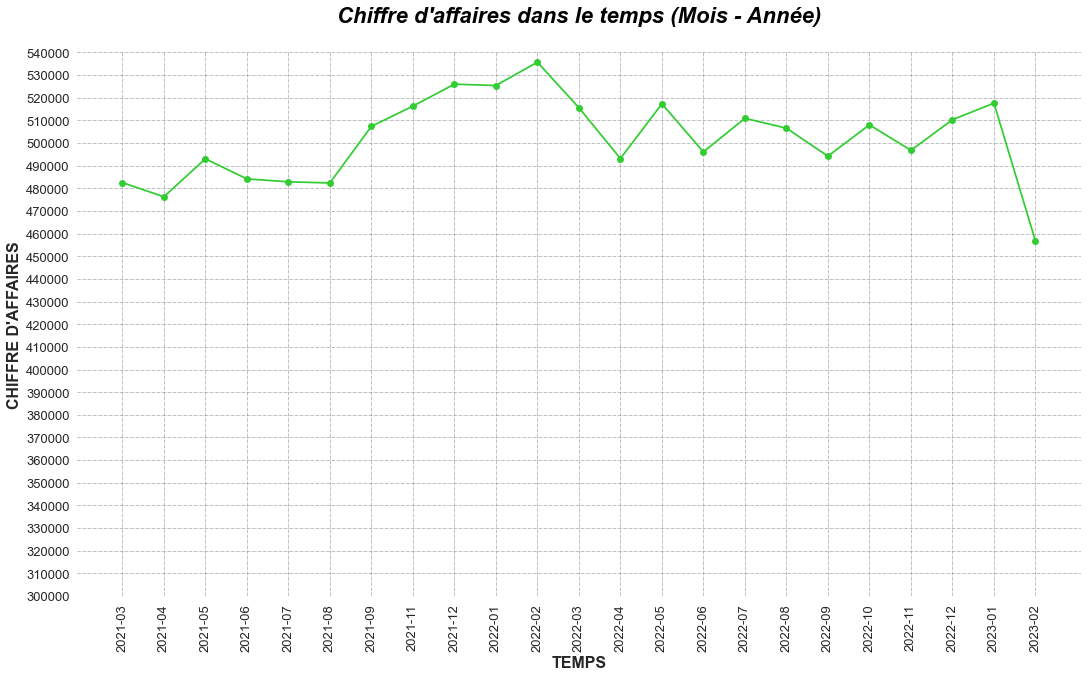

In [57]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (18,10))
ax.set_title("Chiffre d'affaires dans le temps (Mois - Année)",
 fontsize=22, weight='bold',color='Black',style='italic',loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
plt.plot(chiffres_dans_temps_S0['Temps'], chiffres_dans_temps_S0['Prix du produit'].values, c='limegreen', marker = 'o')
plt.xticks(rotation=90, fontsize=13)
plt.ylabel("CHIFFRE D'AFFAIRES",weight='bold',size=16)
plt.xlabel("TEMPS",weight='bold',size=16)
plt.yticks(np.arange(300000, 550000, 10000), fontsize=13)
plt.show()

### <span style="color : #20B2AA">**Proportion de Chiffre d'affaires par Catégorie**</span>

In [58]:
chiffres_par_categ = dataframe_Final.groupby(['Catégorie'])['Prix du produit'].sum().reset_index()
chiffres_par_categ

,Catégorie,Prix du produit
0,0,4222990.36
1,1,4619960.37
2,2,2692489.43


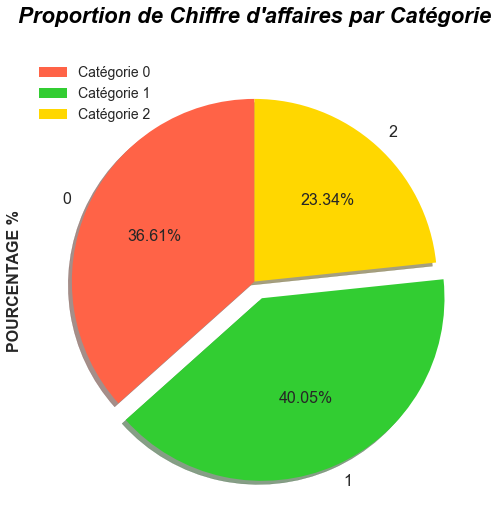

In [59]:
plt.figure(figsize=(18,10))
ax1 = plt.subplot(121, aspect='equal')
explode = (0, 0.1, 0)  
ax1.set_title("Proportion de Chiffre d'affaires par Catégorie",
 fontsize=22, weight='bold',color='Black',style='italic', loc='center',pad=30)
chiffres_par_categ.plot(kind='pie', y = 'Prix du produit', explode=explode, ax=ax1, autopct='%1.2f%%', 
                        startangle=90, shadow=True, labels=(chiffres_par_categ['Catégorie']), legend = True,
                        colors = ['tomato', 'limegreen', 'gold'], 
                        fontsize=16)
ax1.set_ylabel('POURCENTAGE %',weight='bold',size=16)
plt.legend(('Catégorie 0','Catégorie 1', 'Catégorie 2'), loc='upper left', fontsize=14)
plt.show()

### <span style="color : #20B2AA">**Proportion de Chiffre d'affaires par Catégorie dans le temps**</span>

In [60]:
chiffres_par_categ_temps = dataframe_Final.groupby(['Temps','Catégorie'])['Prix du produit'].sum().reset_index()
chiffres_par_categ_temps

,Temps,Catégorie,Prix du produit
0,2021-03,0,193734.74
1,2021-03,1,186974.17
2,2021-03,2,101837.27
3,2021-04,0,205386.68
4,2021-04,1,156138.35
...,...,...,...
64,2023-01,1,210104.41
65,2023-01,2,126153.08
66,2023-02,0,162539.11
67,2023-02,1,180347.24


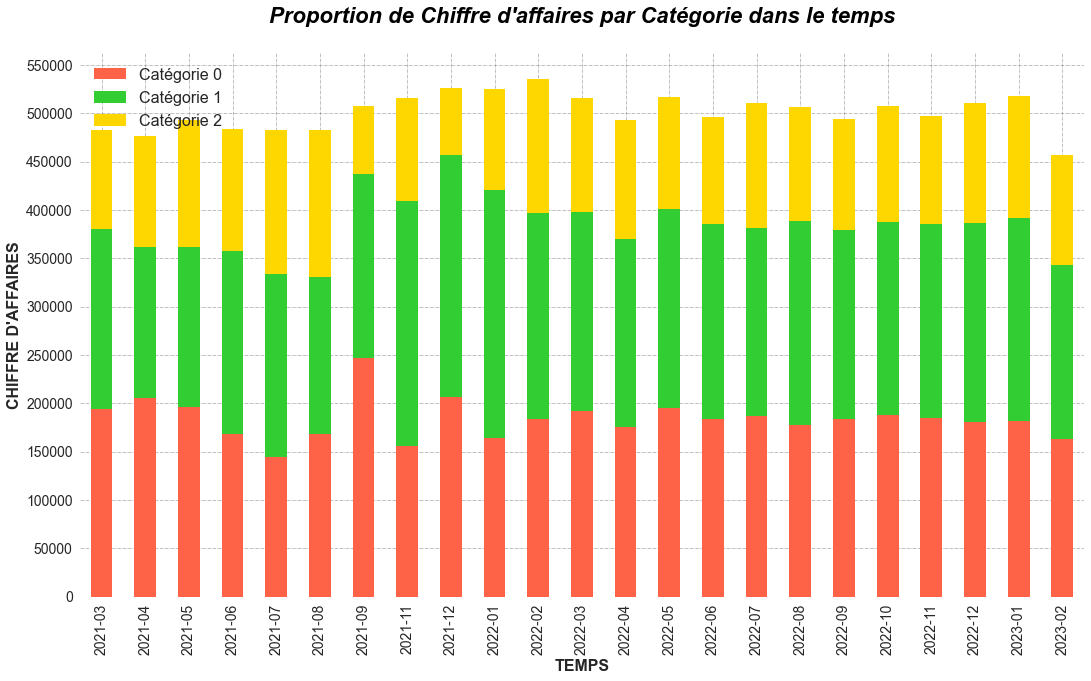

In [61]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (18,10))
ax.set_title("Proportion de Chiffre d'affaires par Catégorie dans le temps",
 fontsize=22, weight='bold',color='Black',style='italic',loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
chiffres_par_categ_temps.groupby(['Temps','Catégorie']).sum().unstack().plot(kind='bar', 
                        y = 'Prix du produit',  ax=ax, stacked=True, figsize = (18,10), 
                        color=['tomato', 'limegreen', 'gold'])
plt.legend(('Catégorie 0','Catégorie 1', 'Catégorie 2'), fontsize=16, loc="upper left")
plt.ylabel("CHIFFRE D'AFFAIRES",weight='bold',size=16)
plt.xlabel("TEMPS",weight='bold',size=16)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(np.arange(0, 600000, 50000), fontsize=14)
plt.show()

### <span style="color : #20B2AA">**Proportion de Chiffre d'affaires par Sexe**</span>

In [62]:
chiffres_par_sexe = dataframe_Final.groupby(['Sexe'])['Prix du produit'].sum().reset_index()
chiffres_par_sexe

,Sexe,Prix du produit
0,f,5705708.42
1,m,5829731.74


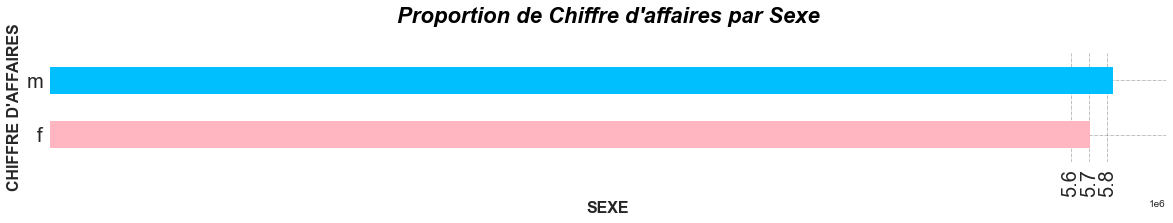

In [63]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (18,10))
ax.set_title("Proportion de Chiffre d'affaires par Sexe",
 fontsize=22, weight='bold',color='Black',style='italic',loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
chiffres_par_sexe.plot(kind='barh', stacked=True, x = 'Sexe', legend = False,
                        y = 'Prix du produit',  ax=ax, figsize = (20,2), 
                        color=['lightpink', 'deepskyblue'])
plt.ylabel("CHIFFRE D'AFFAIRES",weight='bold',size=16)
plt.xlabel("SEXE",weight='bold',size=16)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(np.arange(5600000, 5900000, 100000))
plt.show()

### <span style="color : #20B2AA">**Proportion de Chiffre d'affaires par Sexe dans le Temps**</span>

In [64]:
chiffres_par_sexe_temps = dataframe_Final.groupby(['Temps','Sexe'])['Prix du produit'].sum().reset_index()
chiffres_par_sexe_temps.head(5)

,Temps,Sexe,Prix du produit
0,2021-03,f,235822.24
1,2021-03,m,246723.94
2,2021-04,f,237183.62
3,2021-04,m,239089.90
4,2021-05,f,246718.08


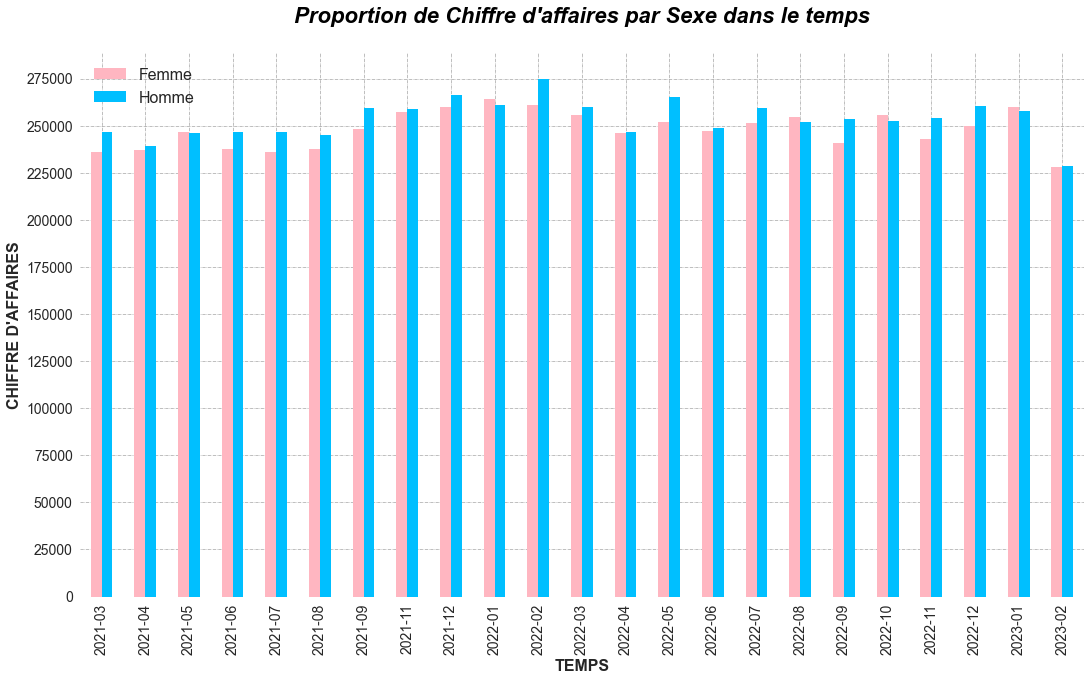

In [65]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (18,10))
ax.set_title("Proportion de Chiffre d'affaires par Sexe dans le temps",
 fontsize=22, weight='bold',color='Black',style='italic',loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
chiffres_par_sexe_temps.groupby(['Temps','Sexe']).sum().unstack().plot(kind='bar', 
                        y = 'Prix du produit', ax=ax, figsize = (18,10), 
                        color=['lightpink', 'deepskyblue'])
plt.legend(('Femme','Homme'), loc="upper left", fontsize=16)
plt.ylabel("CHIFFRE D'AFFAIRES",weight='bold',size=16)
plt.xlabel("TEMPS",weight='bold',size=16)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(np.arange(0, 280000, 25000), fontsize=14)
plt.show()

### <span style="color : #20B2AA">**Chiffre d'affaires par Tranche âge**</span>

In [66]:
chiffres_par_tranche = dataframe_Final.groupby(['Tranche âge','Sexe'])['Prix du produit'].sum().reset_index(name="Chiffre d'affaires")
chiffres_par_tranche

,Tranche âge,Sexe,Chiffre d'affaires
0,[20 ans (moins de)],f,486973.17
1,[20 ans (moins de)],m,505401.97
2,[21 - 30 ans],f,1048781.20
3,[21 - 30 ans],m,1227553.48
4,[31 - 40 ans],f,1296584.15
5,[31 - 40 ans],m,1231071.56
6,[41 - 50 ans],f,1309569.27
7,[41 - 50 ans],m,1505831.61
8,[51 - 60 ans],f,821184.17
9,[51 - 60 ans],m,730719.27


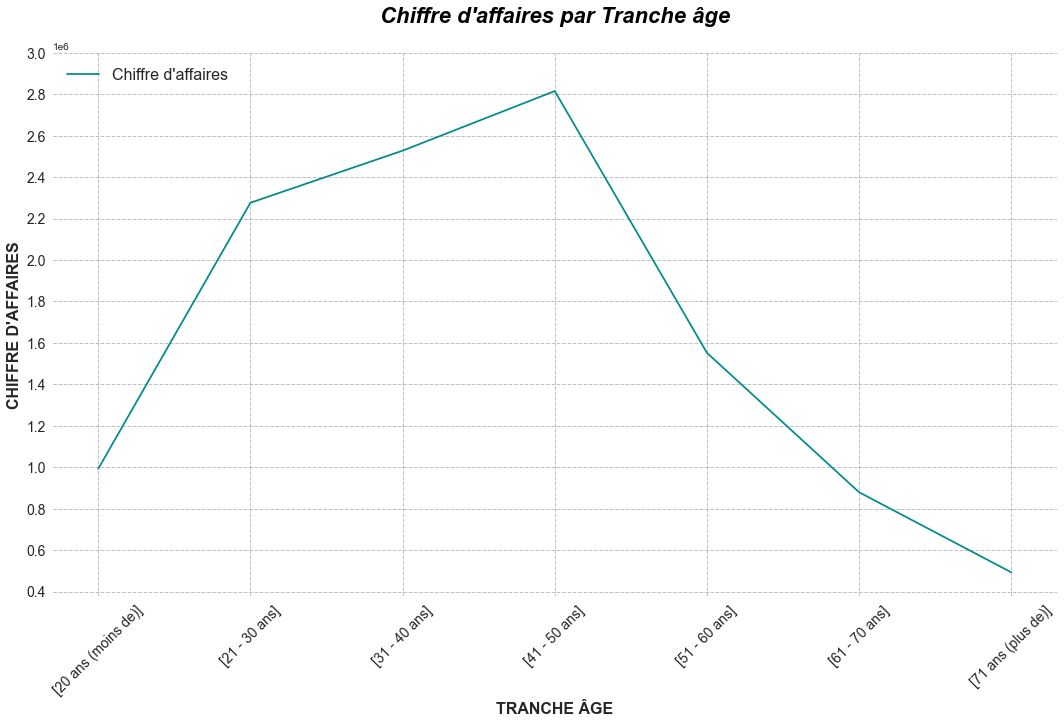

In [67]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (18,10))
ax.set_title("Chiffre d'affaires par Tranche âge",
 fontsize=22, weight='bold',color='Black',style='italic',loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
chiffres_par_tranche.groupby(['Tranche âge']).sum().plot(kind='line', legend = True,
                        y = "Chiffre d'affaires", ax=ax, stacked=True, figsize = (18,10),
                        color=['darkcyan'])
plt.legend(loc="upper left", fontsize=16)
plt.ylabel("CHIFFRE D'AFFAIRES",weight='bold', size=16)
plt.xlabel("TRANCHE ÂGE",weight='bold',size=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(np.arange(400000, 3200000, 200000), fontsize=14)
plt.show()

### <span style="color : #20B2AA">**Chiffre d'affaires par Tranche âge / Sexe**</span>

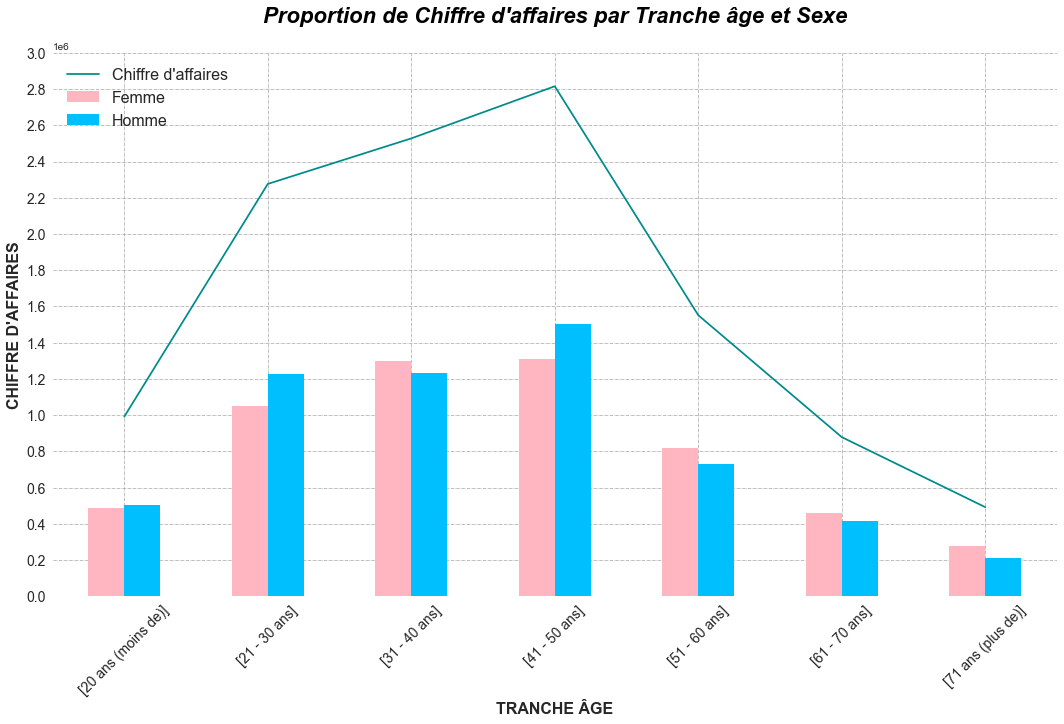

In [68]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (18,10))
ax.set_title("Proportion de Chiffre d'affaires par Tranche âge et Sexe",
 fontsize=22, weight='bold',color='Black',style='italic',loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')

chiffres_par_tranche.groupby(['Tranche âge']).sum().unstack().plot(kind='line', 
                        y = "Chiffre d'affaires", ax=ax, stacked=True, figsize = (18,10),
                        color=['darkcyan']).get_xaxis().set_visible(False)

chiffres_par_tranche.groupby(['Tranche âge','Sexe']).sum().unstack().plot(kind='bar', 
                        y = "Chiffre d'affaires",  ax=ax, figsize = (18,10), 
                        color=['lightpink', 'deepskyblue']).get_xaxis().set_visible(True)

plt.legend(("Chiffre d'affaires", 'Femme','Homme'), loc="upper left", fontsize=16)
plt.ylabel("CHIFFRE D'AFFAIRES",weight='bold',size=16)
plt.xlabel("TRANCHE ÂGE",weight='bold',size=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(np.arange(0, 3200000, 200000), fontsize=14)
plt.show()

### <span style="color : #20B2AA">**Chiffre d'affaires par Tranche âge / Catégorie**</span>

In [69]:
chiffres_par_tranche_catg = dataframe_Final.groupby(['Tranche âge','Catégorie'])['Prix du produit'].sum().reset_index(name="Chiffre d'affaires")
chiffres_par_tranche_catg

,Tranche âge,Catégorie,Chiffre d'affaires
0,[20 ans (moins de)],0,57263.23
1,[20 ans (moins de)],1,196312.20
2,[20 ans (moins de)],2,738799.71
3,[21 - 30 ans],0,164497.91
4,[21 - 30 ans],1,440747.66
5,[21 - 30 ans],2,1671089.11
6,[31 - 40 ans],0,1513013.78
7,[31 - 40 ans],1,935043.99
8,[31 - 40 ans],2,79597.94
9,[41 - 50 ans],0,1684247.83


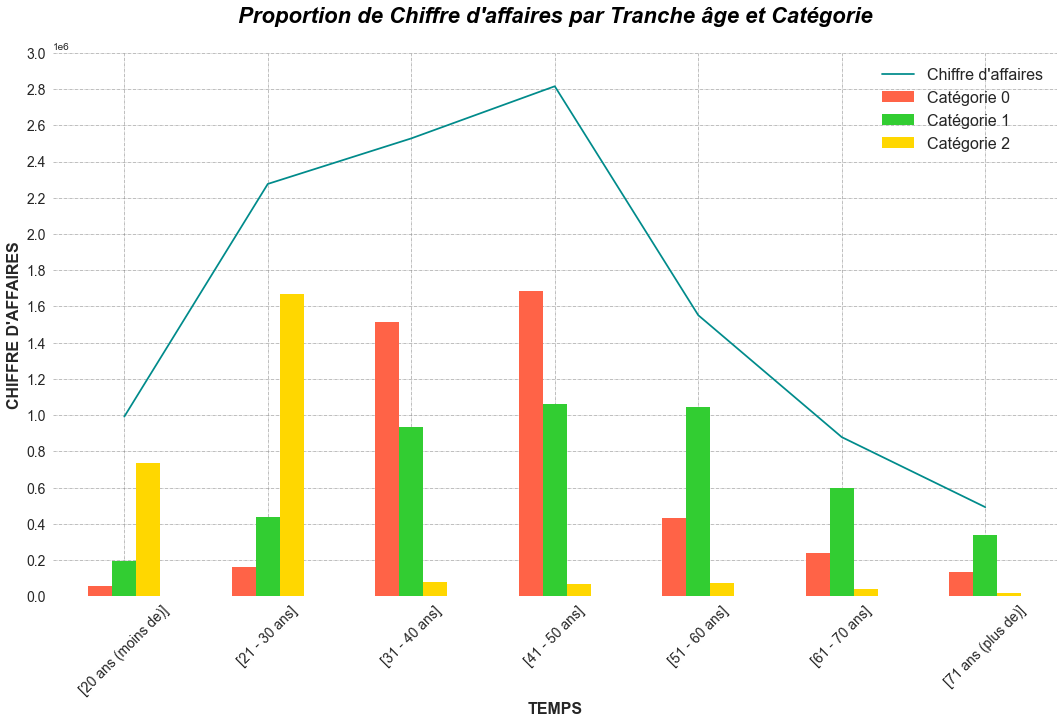

In [70]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (18,10))
ax.set_title("Proportion de Chiffre d'affaires par Tranche âge et Catégorie",
 fontsize=22, weight='bold',color='Black',style='italic',loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')

chiffres_par_tranche.groupby(['Tranche âge']).sum().unstack().plot(kind='line', 
                        y = "Chiffre d'affaires", ax=ax, stacked=True, figsize = (18,10),
                        color=['darkcyan']).get_xaxis().set_visible(False)

chiffres_par_tranche_catg.groupby(['Tranche âge','Catégorie']).sum().unstack().plot(kind='bar', 
                        y = "Chiffre d'affaires",  ax=ax, figsize = (18,10), 
                        color=['tomato', 'limegreen', 'gold']).get_xaxis().set_visible(True)

plt.legend(("Chiffre d'affaires",'Catégorie 0','Catégorie 1', 'Catégorie 2'), loc="upper right", fontsize=16)
plt.ylabel("CHIFFRE D'AFFAIRES",weight='bold',size=16)
plt.xlabel("TEMPS",weight='bold',size=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(np.arange(0, 3200000, 200000), fontsize=14)
plt.show()

## <center><span style="color : #32CD32">**DÉCOMPOSITION EN MOYENNE MOBILE**</span>

In [71]:
chiffres_par_jour_SO = dataframe_Final.groupby(['Date'])['Prix du produit'].sum().reset_index()
chiffres_par_jour_dm = chiffres_par_jour_SO.copy()
chiffres_par_jour_dm['Date'] = chiffres_par_jour_dm['Date'].astype(str)
chiffres_par_jour_dm.set_index('Date',inplace=True)
chiffres_par_jour_dm

,Prix du produit
Date,
2021-03-01,16576.95
2021-03-02,15498.18
2021-03-03,15198.69
2021-03-04,15196.07
2021-03-05,17471.37
...,...
2023-02-24,15207.89
2023-02-25,15761.25
2023-02-26,16304.72


In [72]:
chiffres_par_jour_dm7 = chiffres_par_jour_dm.rolling(7).mean()
chiffres_par_jour_dm7 = chiffres_par_jour_dm7.fillna(value={'Prix du produit': 0})
chiffres_par_jour_dm7 = chiffres_par_jour_dm7.reset_index()
mask_jour_dm7 = (chiffres_par_jour_dm7['Date'] >= '2021-03-07')
chiffres_par_jour_dm7 = chiffres_par_jour_dm7.loc[mask_jour_dm7]
chiffres_par_jour_dm7['Date'] = chiffres_par_jour_dm7['Date'].astype(str)
chiffres_par_jour_dm7.set_index('Date',inplace=True)
chiffres_par_jour_dm7

,Prix du produit
Date,
2021-03-07,15785.495714
2021-03-08,15657.292857
2021-03-09,15687.625714
2021-03-10,15730.222857
2021-03-11,15673.804286
...,...
2023-02-24,16490.454286
2023-02-25,16008.422857
2023-02-26,16036.697143


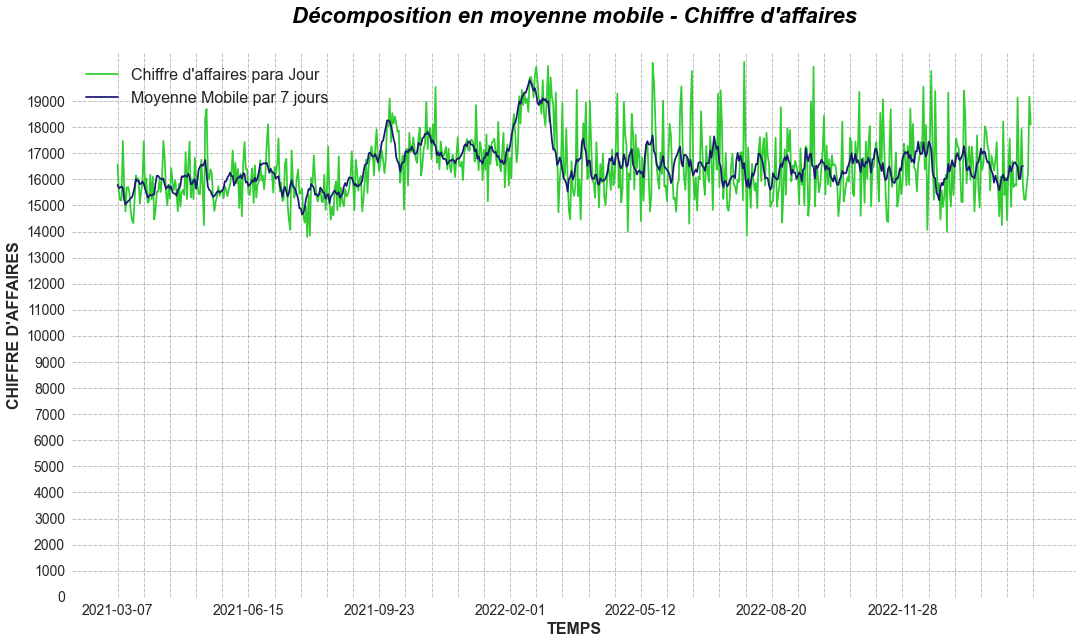

In [73]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (18,10))
ax.set_title("Décomposition en moyenne mobile - Chiffre d'affaires",
 fontsize=22, weight='bold',color='Black',style='italic',loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')

chiffres_par_jour_dm.plot(kind='line', 
                        y = 'Prix du produit', ax=ax, stacked=True, figsize = (18,10),
                        color=['limegreen'])

chiffres_par_jour_dm7.plot(kind='line', 
                        y = 'Prix du produit', ax=ax, stacked=True, figsize = (18,10),
                        color=['MidnightBlue'])

plt.legend(("Chiffre d'affaires para Jour", 'Moyenne Mobile par 7 jours'), loc="upper left", fontsize=16)
plt.ylabel("CHIFFRE D'AFFAIRES",weight='bold',size=16)
plt.xlabel("TEMPS",weight='bold',size=16)
plt.xticks(np.arange(0, 720, 20), rotation=0, fontsize=14)
plt.yticks(np.arange(0, 20000, 1000), fontsize=14)
plt.show()

## <center><span style="color : #32CD32">**LES TOPS ET LES FLOPS**</span>

### <span style="color : #20B2AA">**Produits les plus et les moins vendus par catégorie**</span>

In [74]:
produit_achete_total = dataframe_Final.groupby(['Id du produit','Catégorie']).size().reset_index(name='Quantité de produits achetés')
for categ in [0,1,2]:
    print("\n")
    print("Les produits les plus vendus de la catégorie", categ, "est:")
    print(produit_achete_total.loc[produit_achete_total['Catégorie'] == categ].sort_values('Quantité de produits achetés', ascending=False).head(3))
    print("\n")
    print("Les produits les moins vendus de la catégorie", categ, "est:")
    print(produit_achete_total.loc[produit_achete_total['Catégorie'] == categ].sort_values('Quantité de produits achetés', ascending=True).head(3))
    print("\n")
    print("La moyenne pour la catégorie", categ, "est de:", round(produit_achete_total.loc[produit_achete_total['Catégorie'] == categ]['Quantité de produits achetés'].mean(),2))
    print("La médiane pour la catégorie", categ, "est de:", produit_achete_total.loc[produit_achete_total['Catégorie'] == categ]['Quantité de produits achetés'].median())
    print("Le mode pour la catégorie", categ, "est de:", produit_achete_total.loc[produit_achete_total['Catégorie'] == categ]['Quantité de produits achetés'].mode())  



Les produits les plus vendus de la catégorie 0 est:
    Id du produit  Catégorie  Quantité de produits achetés
475        0_1431          0                          1234
465        0_1422          0                          1233
468        0_1425          0                          1215


Les produits les moins vendus de la catégorie 0 est:
     Id du produit  Catégorie  Quantité de produits achetés
2178         0_898          0                             1
166         0_1151          0                             1
313         0_1284          0                             1


La moyenne pour la catégorie 0 est de: 173.25
La médiane pour la catégorie 0 est de: 48.0
Le mode pour la catégorie 0 est de: 0    9
dtype: int64


Les produits les plus vendus de la catégorie 1 est:
     Id du produit  Catégorie  Quantité de produits achetés
2590         1_369          1                          2237
2643         1_417          1                          2173
2640         1_414          1    

## <center><span style="color : #32CD32">**LA COURBE DE LORENZ**</span>

### <span style="color : #20B2AA">**Chiffres d'affaires par client**</span>

In [75]:
chiffres_client = dataframe_Final.groupby(['Id du client'])['Prix du produit'].sum().reset_index()
chiffres_client.sort_values("Prix du produit", ascending=False).head(10)

,Id du client,Prix du produit
677,c_1609,312755.08
4387,c_4958,282654.61
6336,c_6714,149854.13
2723,c_3454,111801.90
2108,c_2899,5214.05
634,c_1570,5136.14
2513,c_3263,5129.89
7005,c_7319,5120.55
7790,c_8026,4981.14
4725,c_5263,4964.87


### <span style="color : #000000">**Dans ce tableau on peut voir qu'il y a 4 clients potentiels, puisque leurs chiffres d'affaires sont très élevés.**</span>

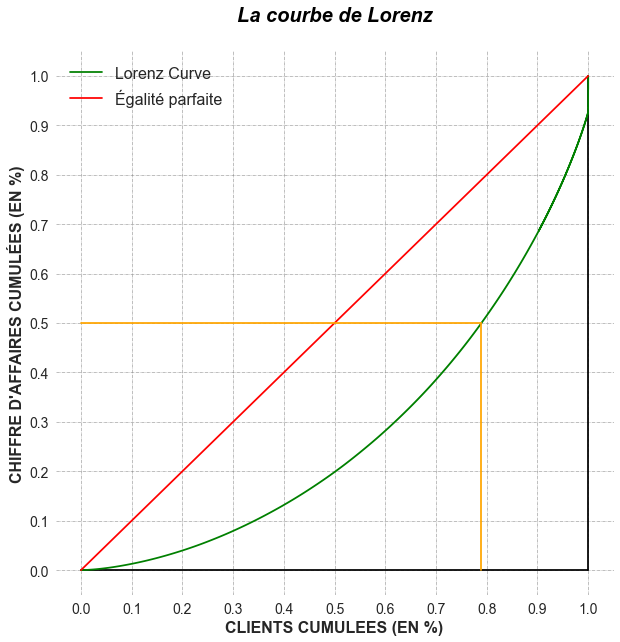

In [76]:
tca = chiffres_client['Prix du produit'].values
n = len(tca)
lorenz = np.cumsum(np.sort(tca)) / tca.sum()
lorenz = np.append([0],lorenz)

fig, ax = plt.subplots(figsize=[10,10])
ax.set_title('La courbe de Lorenz',
 fontsize=20, weight='bold',color='Black',style='italic',loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')

xaxis = np.linspace(0-1/n,1+1/n,n+1)
ax.plot([1,1], [1,0], color='black')
ax.plot([0,1], [0,0], color='black')
ax.plot(xaxis, lorenz, drawstyle='steps-post', color='green', label='Lorenz Curve')
ax.plot([0,1], [0,1], color='red', label='Égalité parfaite')

plt.legend(loc=0,fontsize=16)

plt.ylabel("CHIFFRE D'AFFAIRES CUMULÉES (EN %)",weight='bold',size=16)
plt.xlabel("CLIENTS CUMULEES (EN %)",weight='bold',size=16)

medial = lorenz[(lorenz < 0.5)].size / lorenz.size
plt.plot([0,medial],[0.5,0.5], color='orange')
plt.plot([medial,medial],[0,0.5], color='orange')

plt.xticks(np.arange(0, 1.1, 0.1), fontsize=14)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=14)
plt.show()

### <span style="color : #20B2AA">**Le coefficient de Gini**</span>

In [77]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n 
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
print("Le coefficient de Gini est: ", "{:.2%}".format(gini))

Le coefficient de Gini est:  44.74%


## <center><span style="color : #32CD32">**LE LIEN ENTRE LE GENRE D'UN CLIENT ET LES CATÉGORIES DES LIVRES ACHETÉS**</span>

In [78]:
produit_achete_catg = dataframe_Final.groupby(['Catégorie', 'Sexe']).size().reset_index(name='Quantité de produits achetés')
produit_achete_catg

,Catégorie,Sexe,Quantité de produits achetés
0,0,f,197098
1,0,m,199813
2,1,f,114087
3,1,m,111416
4,2,f,16722
5,2,m,18590


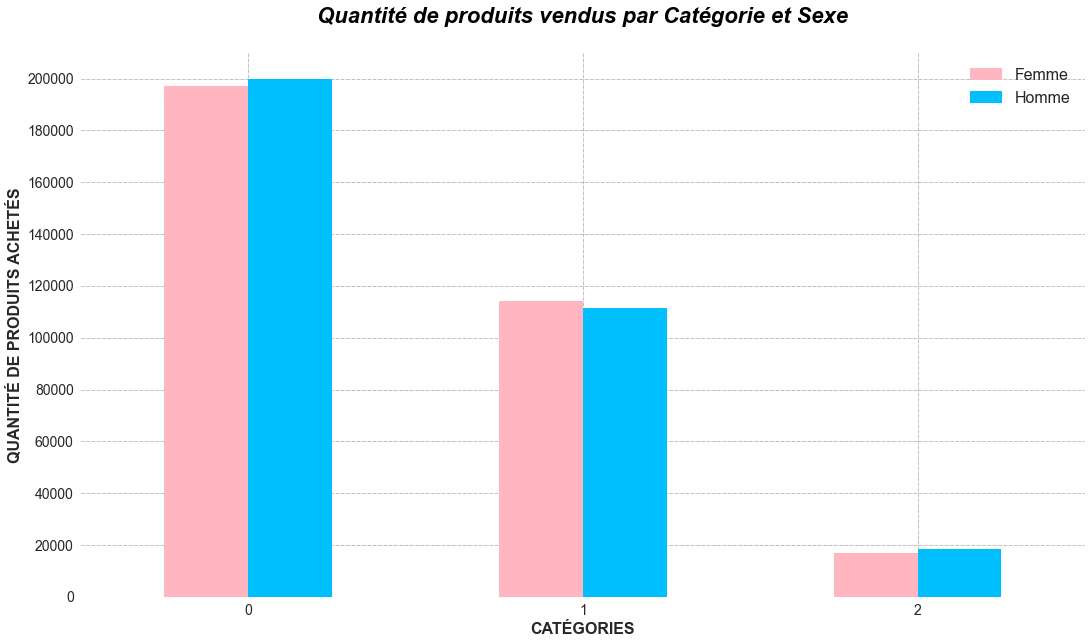

In [79]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (18,10))
ax.set_title("Quantité de produits vendus par Catégorie et Sexe",
 fontsize=22, weight='bold',color='Black',style='italic',loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
produit_achete_catg.groupby(['Catégorie','Sexe']).sum().unstack().plot(kind='bar', 
                        y = 'Quantité de produits achetés', ax=ax, figsize = (18,10), 
                        color=['lightpink', 'deepskyblue'])
plt.legend(('Femme','Homme'), fontsize=16, loc="upper right")
plt.ylabel("QUANTITÉ DE PRODUITS ACHETÉS",weight='bold',size=16)
plt.xlabel("CATÉGORIES",weight='bold',size=16)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(np.arange(0, 211000, 20000), fontsize=14)
plt.show()

In [80]:
produit_achete_catg_test = pd.crosstab(dataframe_Final['Sexe'], dataframe_Final['Catégorie'])
produit_achete_catg_test

Catégorie,0,1,2
Sexe,,,
f,197098,114087,16722
m,199813,111416,18590


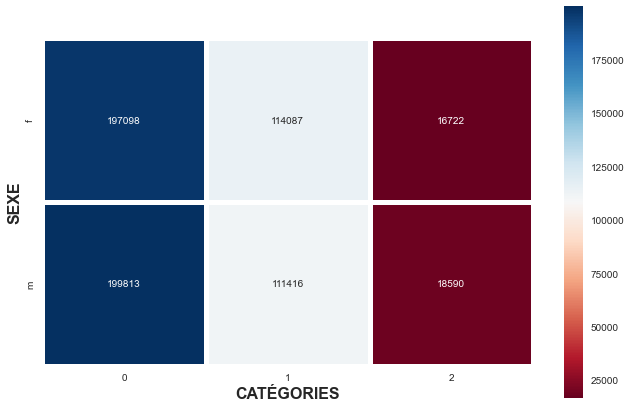

In [81]:
fig, ax = plt.subplots(figsize=(11, 9))
#cmap = sns.diverging_palette(15, 230, 180, 50, as_cmap=True)
sns.heatmap(produit_achete_catg_test, cmap='RdBu', linewidth=5, annot = True, fmt='.0f', cbar_kws={"shrink": .8}, square=True)
plt.ylabel("SEXE",weight='bold',size=16)
plt.xlabel("CATÉGORIES",weight='bold',size=16)
plt.show()

In [82]:
st_chi2, st_p, st_dof, st_exp = stats.chi2_contingency(produit_achete_catg_test)
print('chi2 :', st_chi2) # Statistique khi2
print('P-value :', st_p) # Pvalue : l'unique valeur nécessaire pour prendre notre décision
print('Degré de liberté :', st_dof) # Nombe de degrés de liberté
print('La table théorique est :', st_exp)

chi2 : 143.4684942757229
P-value : 7.017982881623974e-32
Degré de liberté : 2
La table théorique est : [[197878.5927225  112423.73301496  17604.67426253]
 [199032.4072775  113079.26698504  17707.32573747]]


### <span style="color : #000000">**Il n'y a aucune relation entre le choix de la catégorie de livre et le sexe du client. On rejette très largement l’hypothèse au niveau de test 5%.**</span>

## <center><span style="color : #32CD32">**LE LIEN ENTRE L'ÂGE DES CLIENTS ET MONTANT TOTAL DES ACHATS**</span>

In [83]:
client_achat = dataframe_Final.groupby(['Date','Id de session', 'Id du client', 'Âge', 'Tranche âge'])['Prix du produit'].sum().reset_index(name='Montant Total')
client_achat = client_achat.sort_values(['Id du client','Âge'], ascending=True)
client_achat

,Date,Id de session,Id du client,Âge,Tranche âge,Montant Total
47770,2021-06-11,s_47346,c_1,66,[61 - 70 ans],19.53
66032,2021-07-21,s_65433,c_1,66,[61 - 70 ans],11.99
67557,2021-07-25,s_66947,c_1,66,[61 - 70 ans],12.30
68082,2021-07-26,s_67467,c_1,66,[61 - 70 ans],18.94
68389,2021-07-27,s_67769,c_1,66,[61 - 70 ans],11.99
...,...,...,...,...,...,...
310776,2023-01-14,s_326624,c_999,59,[51 - 60 ans],5.99
311504,2023-01-15,s_327362,c_999,59,[51 - 60 ans],4.33
314323,2023-01-21,s_330231,c_999,59,[51 - 60 ans],45.98
317676,2023-01-28,s_333631,c_999,59,[51 - 60 ans],4.89


In [84]:
age_montant_total_achats = client_achat.groupby(['Id du client','Âge','Tranche âge'])['Montant Total'].sum().reset_index(name='Montant Total')
age_montant_total_achats.sort_values(['Montant Total'], ascending=False).head(20)

,Id du client,Âge,Tranche âge,Montant Total
1913,c_1609,42,[41 - 50 ans],164358.02
12327,c_4958,23,[21 - 30 ans],150247.66
1912,c_1609,41,[41 - 50 ans],123871.09
12326,c_4958,22,[21 - 30 ans],109414.89
17799,c_6714,54,[51 - 60 ans],78702.86
7645,c_3454,53,[51 - 60 ans],60010.99
17798,c_6714,53,[51 - 60 ans],57175.64
7644,c_3454,52,[51 - 60 ans],42034.20
1914,c_1609,43,[41 - 50 ans],24525.97
12328,c_4958,24,[21 - 30 ans],22992.06


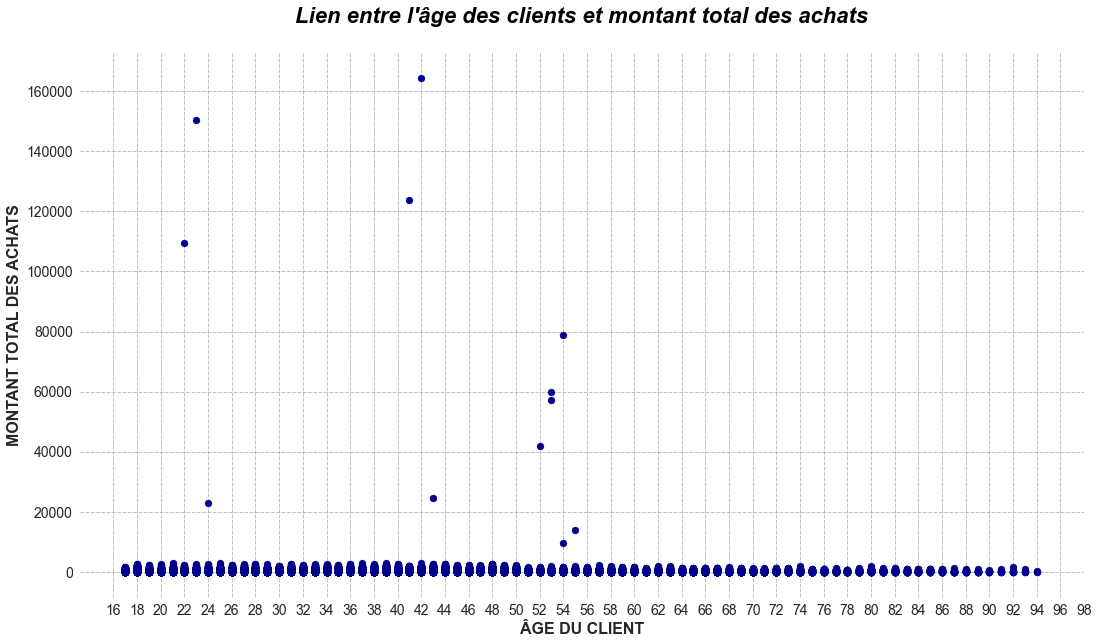

In [85]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (18,10))
ax.set_title("Lien entre l'âge des clients et montant total des achats",
 fontsize=22, weight='bold',color='Black',style='italic',loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')

plt.scatter(age_montant_total_achats['Âge'], age_montant_total_achats['Montant Total'].values, c='Darkblue')

plt.ylabel("MONTANT TOTAL DES ACHATS", weight='bold', size=16)
plt.xlabel("ÂGE DU CLIENT", weight='bold', size=16)

plt.xticks(np.arange(16, 100, 2), rotation=0, fontsize=14)
plt.yticks(np.arange(0, 170000, 20000), fontsize=14)
plt.show()

In [86]:
for client in ['c_1609','c_3454','c_4958','c_6714']:
    age_montant_total_achats = age_montant_total_achats.drop(index=age_montant_total_achats[age_montant_total_achats['Id du client'] == client].index)
age_montant_total_achats.sort_values(['Montant Total'], ascending=False).head(20)

,Id du client,Âge,Tranche âge,Montant Total
1320,c_1422,42,[41 - 50 ans],3157.75
7060,c_3263,37,[31 - 40 ans],3072.44
9018,c_3892,39,[31 - 40 ans],3010.07
7147,c_3290,25,[21 - 30 ans],2951.01
21114,c_7773,21,[21 - 30 ans],2891.93
5917,c_2899,28,[21 - 30 ans],2845.68
3856,c_2234,21,[21 - 30 ans],2834.58
1788,c_1570,43,[41 - 50 ans],2826.98
15565,c_6,18,[20 ans (moins de)],2822.29
13266,c_5263,24,[21 - 30 ans],2821.81


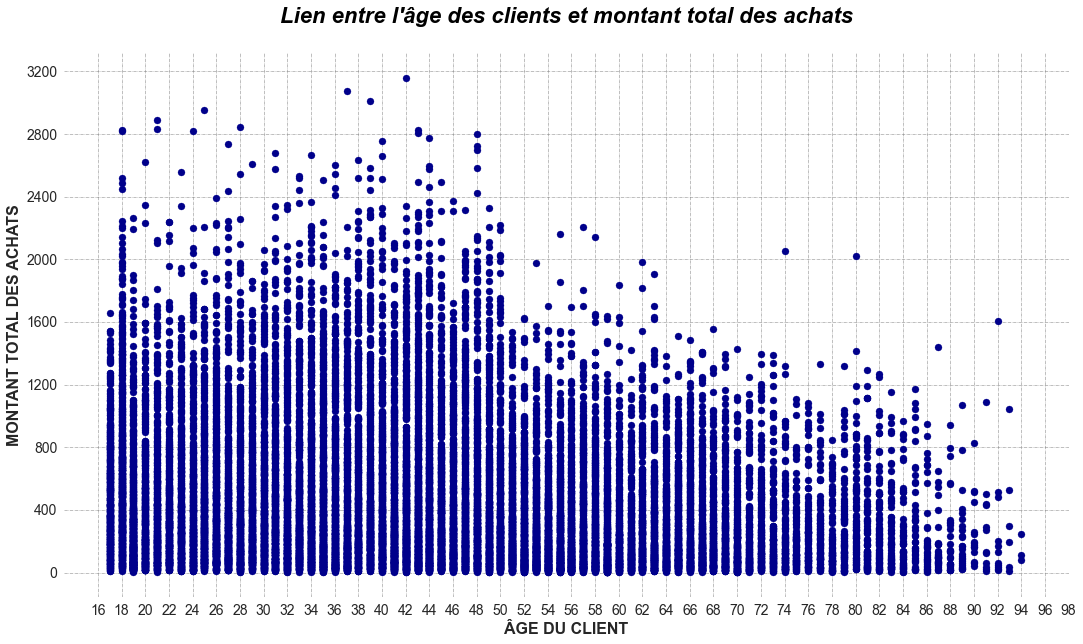

In [87]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (18,10))
ax.set_title("Lien entre l'âge des clients et montant total des achats",
 fontsize=22, weight='bold',color='Black',style='italic',loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')

plt.scatter(age_montant_total_achats['Âge'], age_montant_total_achats['Montant Total'].values, c='Darkblue')

plt.ylabel("MONTANT TOTAL DES ACHATS", weight='bold', size=16)
plt.xlabel("ÂGE DU CLIENT", weight='bold', size=16)

plt.xticks(np.arange(16, 100, 2), rotation=0, fontsize=14)
plt.yticks(np.arange(0, 3300, 400), fontsize=14)
plt.show()

In [88]:
pd.DataFrame(pearsonr(age_montant_total_achats["Âge"], age_montant_total_achats["Montant Total"]), 
             index = ['Pearsons Correlation','P_value'],
            columns = ['Resultat_test'])

,Resultat_test
Pearsons Correlation,-1.696690e-01
P_value,1.672803e-155


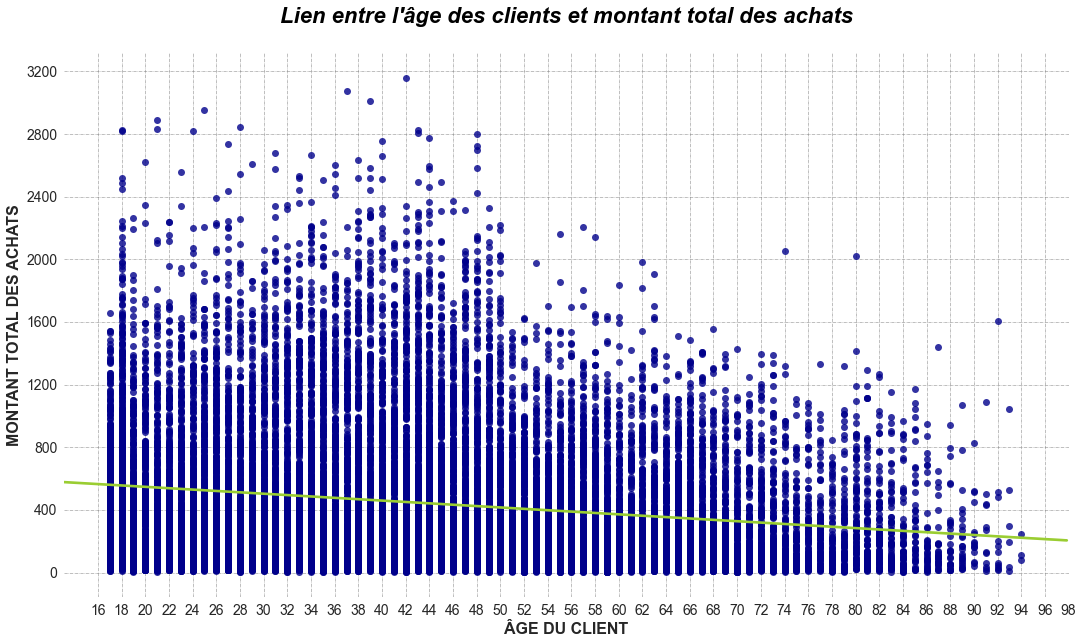

In [89]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (18,10))
ax.set_title("Lien entre l'âge des clients et montant total des achats",
 fontsize=22, weight='bold',color='Black',style='italic',loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')

#plt.scatter(age_montant_total['Âge'], age_montant_total['Montant Total'].values, c='Darkblue')
ax = sns.regplot(x=age_montant_total_achats['Âge'], y=age_montant_total_achats['Montant Total'], ci=68, truncate=False, 
                 scatter_kws={"color": "Darkblue"}, line_kws={"color": "yellowgreen"})

plt.ylabel("MONTANT TOTAL DES ACHATS", weight='bold', size=16)
plt.xlabel("ÂGE DU CLIENT", weight='bold', size=16)

plt.xticks(np.arange(16, 100, 2), rotation=0, fontsize=14)
plt.yticks(np.arange(0, 3300, 400), fontsize=14)
plt.show()

In [90]:
corr, st_p = pearsonr(age_montant_total_achats["Âge"], age_montant_total_achats["Montant Total"]) 
print('Pearsons correlation : %.3f' % corr)
print('P-value :', st_p)

Pearsons correlation : -0.170
P-value : 1.672802589728912e-155


### <span style="color : #000000">**Une valeur négative "-0.170" (corrélation négative) signifiant que lorsqu'une des variable augmente (Âge du client), l'autre diminue (Montant total des achats)**</span>

### <span style="color : #20B2AA">**Lien entre Tranche âge et le montant total des achats**</span>

In [91]:
age_montant_total_achats = age_montant_total_achats.sort_values(['Tranche âge'], ascending=True)
age_montant_total_achats = age_montant_total_achats.reset_index(drop=True)
age_montant_total_achats.sort_values(['Montant Total'], ascending=False)

,Id du client,Âge,Tranche âge,Montant Total
13492,c_1422,42,[41 - 50 ans],3157.75
10388,c_3263,37,[31 - 40 ans],3072.44
7190,c_3892,39,[31 - 40 ans],3010.07
3421,c_3290,25,[21 - 30 ans],2951.01
2249,c_7773,21,[21 - 30 ans],2891.93
...,...,...,...,...
20071,c_1485,64,[61 - 70 ans],3.28
19614,c_5729,52,[51 - 60 ans],3.24
14047,c_8483,42,[41 - 50 ans],2.99
4985,c_1056,28,[21 - 30 ans],2.95


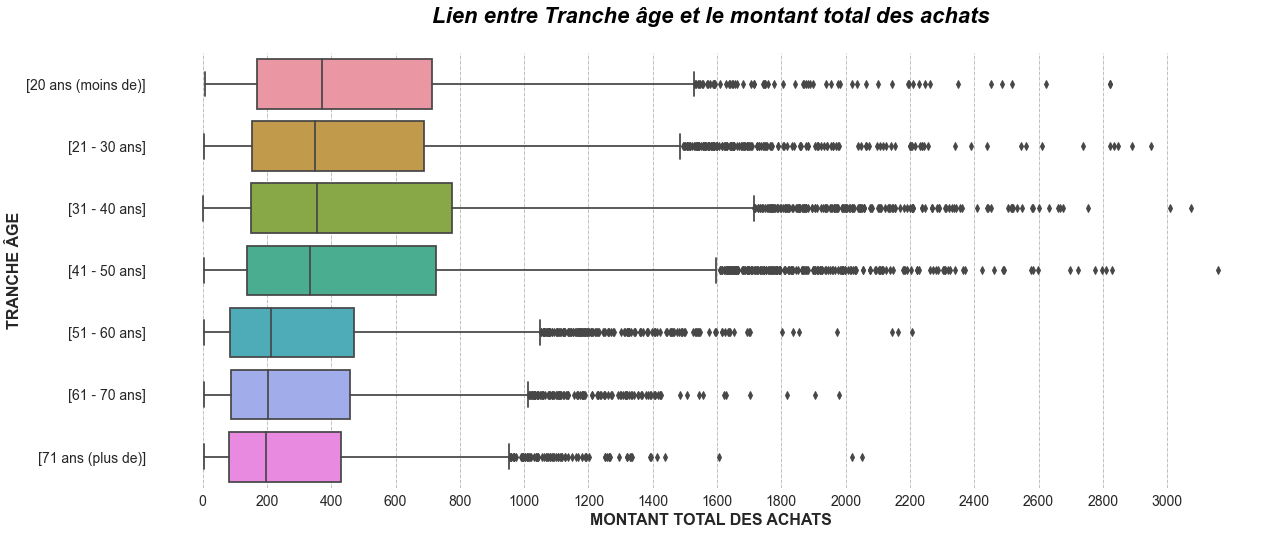

In [92]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (20, 8))
ax.set_title("Lien entre Tranche âge et le montant total des achats",
 fontsize=22, weight='bold',color='Black',style='italic',loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')

ax = sns.boxplot(y='Tranche âge', x='Montant Total', data=age_montant_total_achats, orient="h")

plt.ylabel("TRANCHE ÂGE",weight='bold',size=16)
plt.xlabel("MONTANT TOTAL DES ACHATS",weight='bold',size=16)
plt.xticks(np.arange(0, 3200, 200), fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [93]:
#ancien
age_montant_total = dataframe_Final.groupby(['Âge'])['Prix du produit'].sum().reset_index(name='Montant Total')
age_montant_total

,Âge,Montant Total
0,17,223666.37
1,18,379228.40
2,19,216501.67
3,20,172978.70
4,21,167650.71
...,...,...
73,90,3989.77
74,91,3400.39
75,92,3284.85
76,93,2115.62


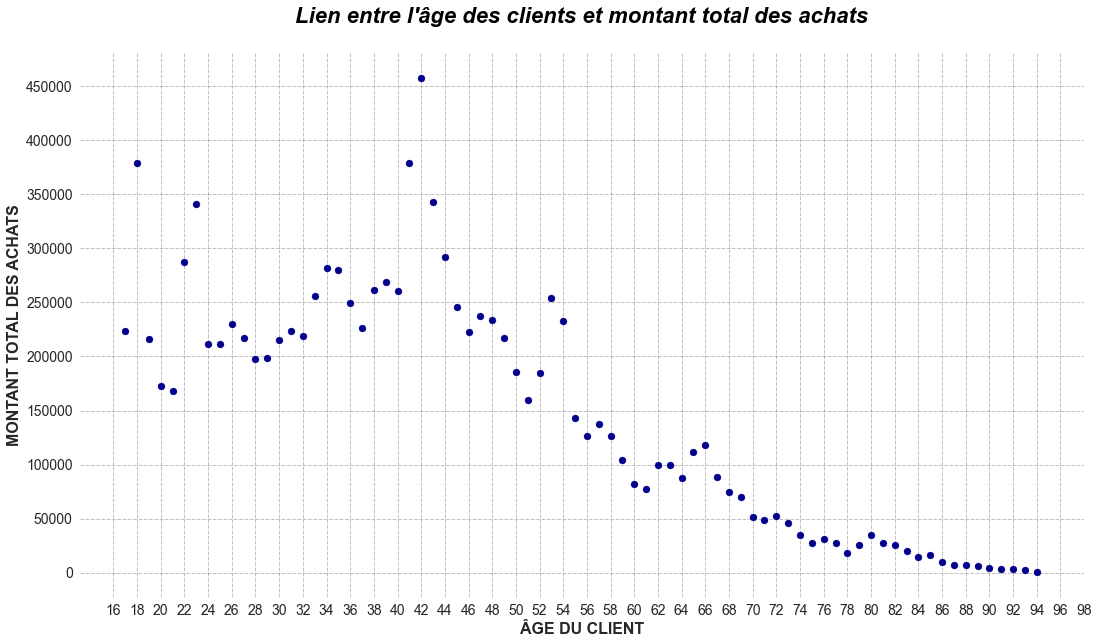

In [94]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (18,10))
ax.set_title("Lien entre l'âge des clients et montant total des achats",
 fontsize=22, weight='bold',color='Black',style='italic',loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')

plt.scatter(age_montant_total['Âge'], age_montant_total['Montant Total'].values, c='Darkblue')

plt.ylabel("MONTANT TOTAL DES ACHATS", weight='bold', size=16)
plt.xlabel("ÂGE DU CLIENT", weight='bold', size=16)

plt.xticks(np.arange(16, 100, 2), rotation=0, fontsize=14)
plt.yticks(np.arange(0, 500000, 50000), fontsize=14)
plt.show()

In [95]:
pd.DataFrame(pearsonr(age_montant_total["Âge"], age_montant_total["Montant Total"]), 
             index = ['Pearsons Correlation','P_value'],
            columns = ['Resultat_test'])

,Resultat_test
Pearsons Correlation,-8.556656e-01
P_value,1.926780e-23


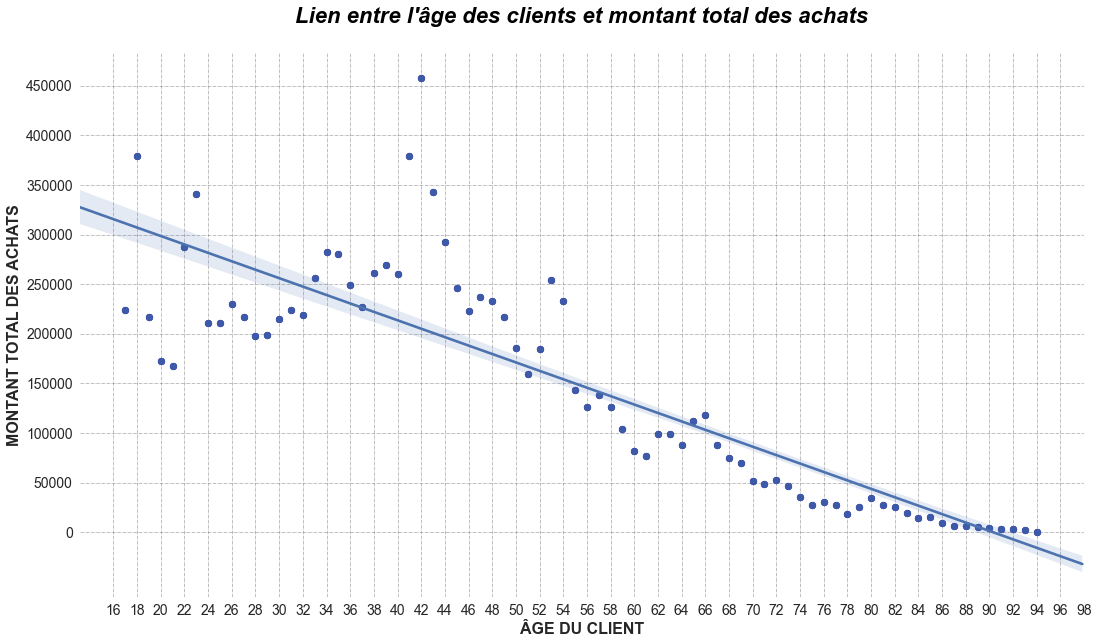

In [96]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (18,10))
ax.set_title("Lien entre l'âge des clients et montant total des achats",
 fontsize=22, weight='bold',color='Black',style='italic',loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')

plt.scatter(age_montant_total['Âge'], age_montant_total['Montant Total'].values, c='Darkblue')

ax = sns.regplot(x=age_montant_total['Âge'], y=age_montant_total['Montant Total'], ci=68, truncate=False)

plt.ylabel("MONTANT TOTAL DES ACHATS", weight='bold', size=16)
plt.xlabel("ÂGE DU CLIENT", weight='bold', size=16)

plt.xticks(np.arange(16, 100, 2), rotation=0, fontsize=14)
plt.yticks(np.arange(0, 500000, 50000), fontsize=14)
plt.show()

In [97]:
corr, _ = pearsonr(age_montant_total["Âge"], age_montant_total["Montant Total"]) 
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.856


### <span style="color : #000000">**Une valeur négative "-0.856" (corrélation négative) signifiant que lorsqu'une des variable augmente (Âge du client), l'autre diminue (Montant total des achats)**</span>

## <center><span style="color : #32CD32">**LE LIEN ENTRE L'ÂGE DES CLIENTS ET LA FRÉQUENCE D'ACHAT**</span>

In [98]:
age_fréquence_achat = client_achat.groupby(['Id du client', 'Âge', 'Tranche âge'])['Id de session'].count().reset_index(name='Fréquence Achat')
age_fréquence_achat.sort_values(['Fréquence Achat'], ascending=False).head(20)

,Id du client,Âge,Tranche âge,Fréquence Achat
1913,c_1609,42,[41 - 50 ans],5521
1912,c_1609,41,[41 - 50 ans],4189
7645,c_3454,53,[51 - 60 ans],2907
7644,c_3454,52,[51 - 60 ans],2080
12327,c_4958,23,[21 - 30 ans],2030
12326,c_4958,22,[21 - 30 ans],1452
17799,c_6714,54,[51 - 60 ans],1322
17798,c_6714,53,[51 - 60 ans],994
1914,c_1609,43,[41 - 50 ans],881
7646,c_3454,54,[51 - 60 ans],458


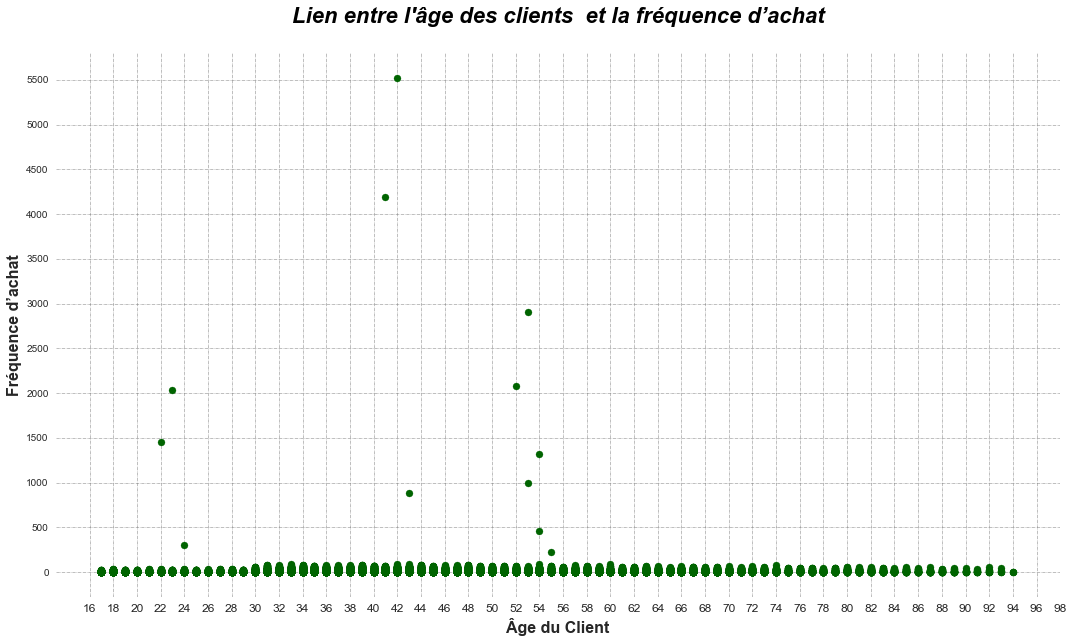

In [99]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (18,10))
ax.set_title("Lien entre l'âge des clients  et la fréquence d’achat",
 fontsize=22, weight='bold',color='Black',style='italic',loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')

plt.scatter(age_fréquence_achat['Âge'], age_fréquence_achat['Fréquence Achat'].values, c='darkgreen')

plt.ylabel("Fréquence d’achat", weight='bold', size=16)
plt.xlabel("Âge du Client", weight='bold', size=16)

plt.xticks(np.arange(16, 100, 2))
plt.yticks(np.arange(0, 6000, 500))

plt.xticks(rotation=0, fontsize=12)
plt.show()

In [100]:
for client in ['c_1609','c_3454','c_4958','c_6714']:
    age_fréquence_achat = age_fréquence_achat.drop(index=age_fréquence_achat[age_fréquence_achat['Id du client'] == client].index)
age_fréquence_achat.sort_values(['Fréquence Achat'], ascending=False).head(20)

,Id du client,Âge,Tranche âge,Fréquence Achat
14327,c_5602,33,[31 - 40 ans],89
3952,c_2265,54,[51 - 60 ans],88
22028,c_8063,60,[51 - 60 ans],86
1788,c_1570,43,[41 - 50 ans],86
1320,c_1422,42,[41 - 50 ans],86
18585,c_6969,39,[31 - 40 ans],85
3363,c_2077,38,[31 - 40 ans],85
23463,c_8526,57,[51 - 60 ans],84
23494,c_8537,31,[31 - 40 ans],84
9425,c_4023,44,[41 - 50 ans],83


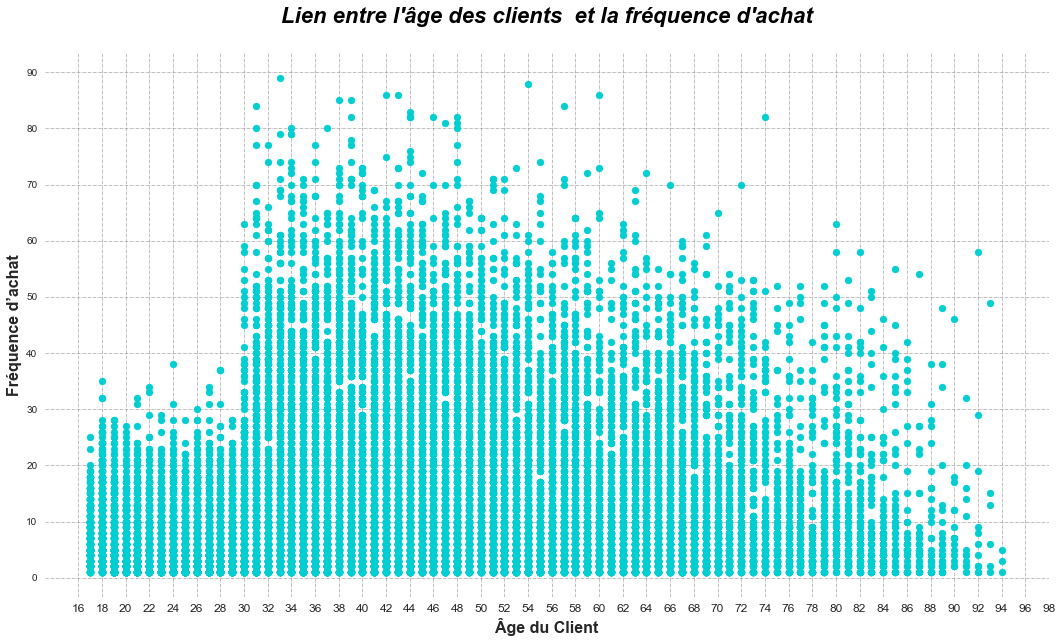

In [101]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (18,10))
ax.set_title("Lien entre l'âge des clients  et la fréquence d'achat",
 fontsize=22, weight='bold',color='Black',style='italic',loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')

plt.scatter(age_fréquence_achat['Âge'], age_fréquence_achat['Fréquence Achat'].values, c='darkturquoise')

plt.ylabel("Fréquence d’achat", weight='bold', size=16)
plt.xlabel("Âge du Client", weight='bold', size=16)

plt.xticks(np.arange(16, 100, 2))
plt.yticks(np.arange(0, 100, 10))

plt.xticks(rotation=0, fontsize=12)
plt.show()

In [102]:
pd.DataFrame(pearsonr(age_fréquence_achat["Âge"], age_fréquence_achat["Fréquence Achat"]), 
             index = ['Pearsons Correlation','P_value'],
            columns = ['Resultat_test'])

,Resultat_test
Pearsons Correlation,1.040936e-01
P_value,3.391763e-59


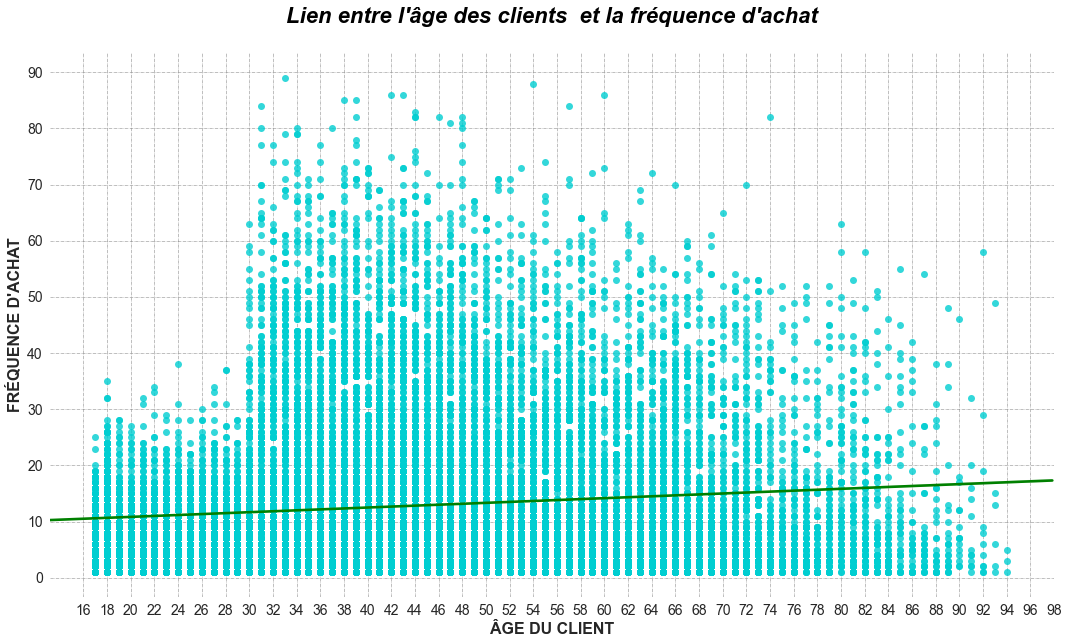

In [103]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (18,10))
ax.set_title("Lien entre l'âge des clients  et la fréquence d'achat",
 fontsize=22, weight='bold',color='Black',style='italic',loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')

#plt.scatter(age_fréquence_achat['Âge'], age_fréquence_achat['Fréquence Achat'].values, c='red')
ax = sns.regplot(x=age_fréquence_achat['Âge'], y=age_fréquence_achat['Fréquence Achat'], ci=68, truncate=False, 
                 scatter_kws={"color": "darkturquoise"}, line_kws={"color": "green"})

plt.ylabel("FRÉQUENCE D'ACHAT", weight='bold', size=16)
plt.xlabel("ÂGE DU CLIENT", weight='bold', size=16)

plt.xticks(np.arange(16, 100, 2), rotation=0, fontsize=14)
plt.yticks(np.arange(0, 100, 10), fontsize=14)
plt.show()

In [104]:
corr, st_p = pearsonr(age_fréquence_achat["Âge"], age_fréquence_achat["Fréquence Achat"]) 
print('Pearsons correlation : %.3f' % corr)
print('P-value :', st_p)

Pearsons correlation : 0.104
P-value : 3.391762888770238e-59


### <span style="color : #000000">**La probabilité otbenue étant faible < 0.05 on rejette l hypothèse nulle.  L'âge du client et la Fréquence Achat corrèle positivement.**</span>

### <span style="color : #20B2AA">**Lien entre Tranche âge et la fréquence d'achat des clients**</span>

In [105]:
age_fréquence_achat = age_fréquence_achat.sort_values(['Tranche âge'], ascending=True)
age_fréquence_achat = age_fréquence_achat.reset_index(drop=True)
age_fréquence_achat.sort_values(['Fréquence Achat'], ascending=False)

,Id du client,Âge,Tranche âge,Fréquence Achat
10222,c_5602,33,[31 - 40 ans],89
17276,c_2265,54,[51 - 60 ans],88
16223,c_8063,60,[51 - 60 ans],86
13492,c_1422,42,[41 - 50 ans],86
14125,c_1570,43,[41 - 50 ans],86
...,...,...,...,...
5808,c_5161,25,[21 - 30 ans],1
20812,c_8341,65,[61 - 70 ans],1
5767,c_434,26,[21 - 30 ans],1
5766,c_434,27,[21 - 30 ans],1


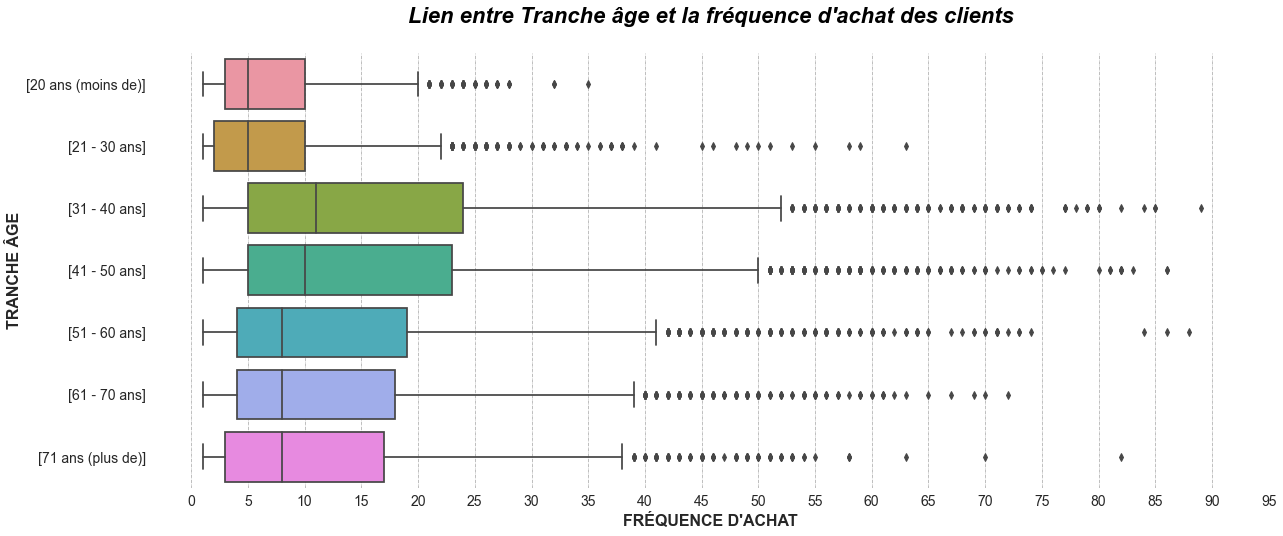

In [106]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (20, 8))
ax.set_title("Lien entre Tranche âge et la fréquence d'achat des clients",
 fontsize=22, weight='bold',color='Black',style='italic',loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')

ax = sns.boxplot(y='Tranche âge', x='Fréquence Achat', data=age_fréquence_achat, orient="h")

plt.ylabel("TRANCHE ÂGE",weight='bold',size=16)
plt.xlabel("FRÉQUENCE D'ACHAT",weight='bold',size=16)
plt.xticks(np.arange(0, 100, 5), fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## <center><span style="color : #32CD32">**LE LIEN ENTRE L'ÂGE DES CLIENTS ET LA TAILLE DU PANIER MOYEN**</span>

In [107]:
age_panier_moyen = client_achat.groupby(['Id du client','Âge','Tranche âge'])['Montant Total'].mean().reset_index(name='Montant Moyenne')
age_panier_moyen.sort_values(['Id du client'], ascending=True).head(20)

,Id du client,Âge,Tranche âge,Montant Moyenne
0,c_1,66,[61 - 70 ans],22.051538
1,c_1,67,[61 - 70 ans],12.179444
2,c_1,68,[61 - 70 ans],44.290000
3,c_10,65,[61 - 70 ans],36.636250
4,c_10,66,[61 - 70 ans],40.195333
5,c_10,67,[61 - 70 ans],54.830000
6,c_100,29,[21 - 30 ans],74.290000
7,c_100,30,[21 - 30 ans],15.990000
9,c_1000,56,[51 - 60 ans],26.198929
10,c_1000,57,[51 - 60 ans],18.580000


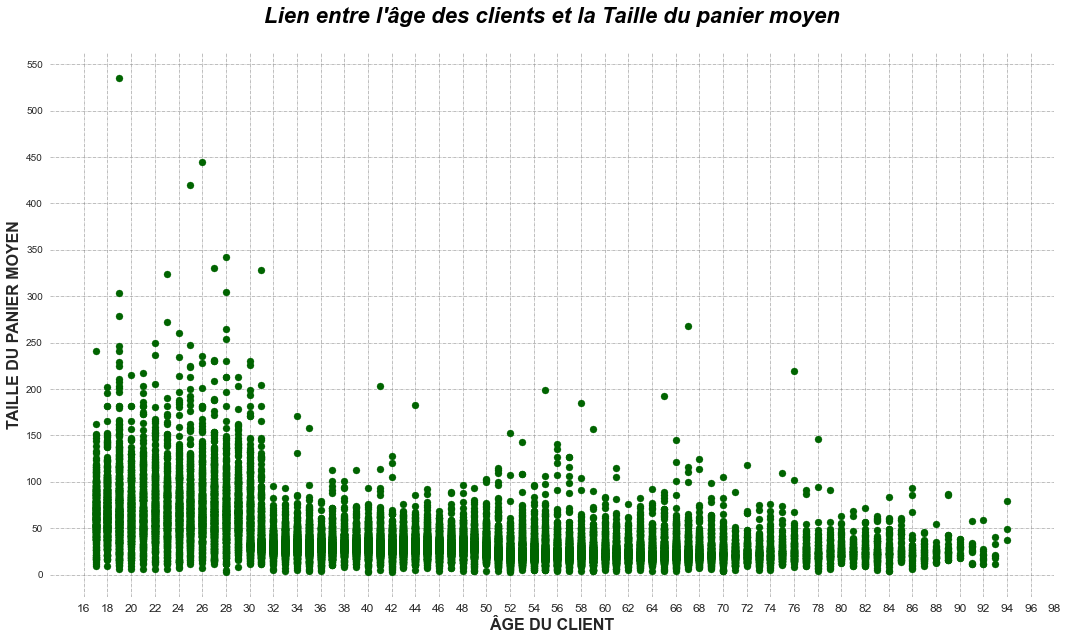

In [108]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (18,10))
ax.set_title("Lien entre l'âge des clients et la Taille du panier moyen",
 fontsize=22, weight='bold',color='Black',style='italic',loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')

plt.scatter(age_panier_moyen['Âge'], age_panier_moyen['Montant Moyenne'].values, c='Darkgreen')

plt.ylabel("TAILLE DU PANIER MOYEN", weight='bold', size=16)
plt.xlabel("ÂGE DU CLIENT", weight='bold', size=16)

plt.xticks(np.arange(16, 100, 2))
plt.yticks(np.arange(0, 600, 50))

plt.xticks(rotation=0, fontsize=12)
plt.show()

In [109]:
pd.DataFrame(pearsonr(age_panier_moyen["Âge"], age_panier_moyen["Montant Moyenne"]), 
             index = ['Pearsons Correlation','P_value'],
            columns = ['Resultat_test'])

,Resultat_test
Pearsons Correlation,-0.522759
P_value,0.000000


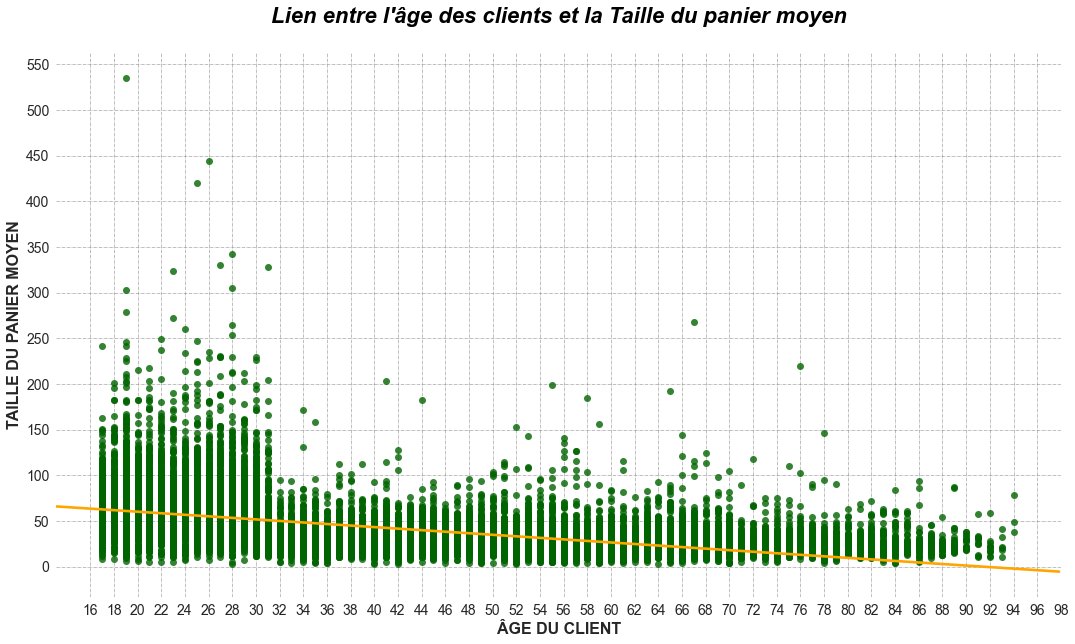

In [110]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (18,10))
ax.set_title("Lien entre l'âge des clients et la Taille du panier moyen",
 fontsize=22, weight='bold',color='Black',style='italic',loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')

ax = sns.regplot(x=age_panier_moyen['Âge'], y=age_panier_moyen['Montant Moyenne'], ci=68, truncate=False, 
                 scatter_kws={"color": "Darkgreen"}, line_kws={"color": "orange"})

plt.ylabel("TAILLE DU PANIER MOYEN", weight='bold', size=16)
plt.xlabel("ÂGE DU CLIENT", weight='bold', size=16)

plt.xticks(np.arange(16, 100, 2), rotation=0, fontsize=14)
plt.yticks(np.arange(0, 600, 50), fontsize=14)
plt.show()

In [111]:
corr, st_p = pearsonr(age_panier_moyen["Âge"], age_panier_moyen["Montant Moyenne"]) 
print('Pearsons correlation : %.3f' % corr)
print('P-value :', st_p)

Pearsons correlation : -0.523
P-value : 0.0


### <span style="color : #000000">**La probabilité obtenue étant faible < 0.05 on rejette l hypothèse nulle.  L'âge du client et le la Taille du panier moyen corrèle négativement.**</span>

### <span style="color : #20B2AA">**Lien entre Tranche âge et la Taille du panier moyen**</span>

In [112]:
age_panier_moyen = age_panier_moyen.sort_values(['Tranche âge'], ascending=True)
age_panier_moyen = age_panier_moyen.reset_index(drop=True)
age_panier_moyen.sort_values(['Montant Moyenne'], ascending=False)

,Id du client,Âge,Tranche âge,Montant Moyenne
1620,c_3241,19,[20 ans (moins de)],535.17
3056,c_6761,26,[21 - 30 ans],444.20
5227,c_6431,25,[21 - 30 ans],419.90
5365,c_6473,28,[21 - 30 ans],342.36
5601,c_4903,27,[21 - 30 ans],330.32
...,...,...,...,...
20948,c_1485,64,[61 - 70 ans],3.28
19000,c_5729,52,[51 - 60 ans],3.24
14079,c_8483,42,[41 - 50 ans],2.99
5236,c_1056,28,[21 - 30 ans],2.95


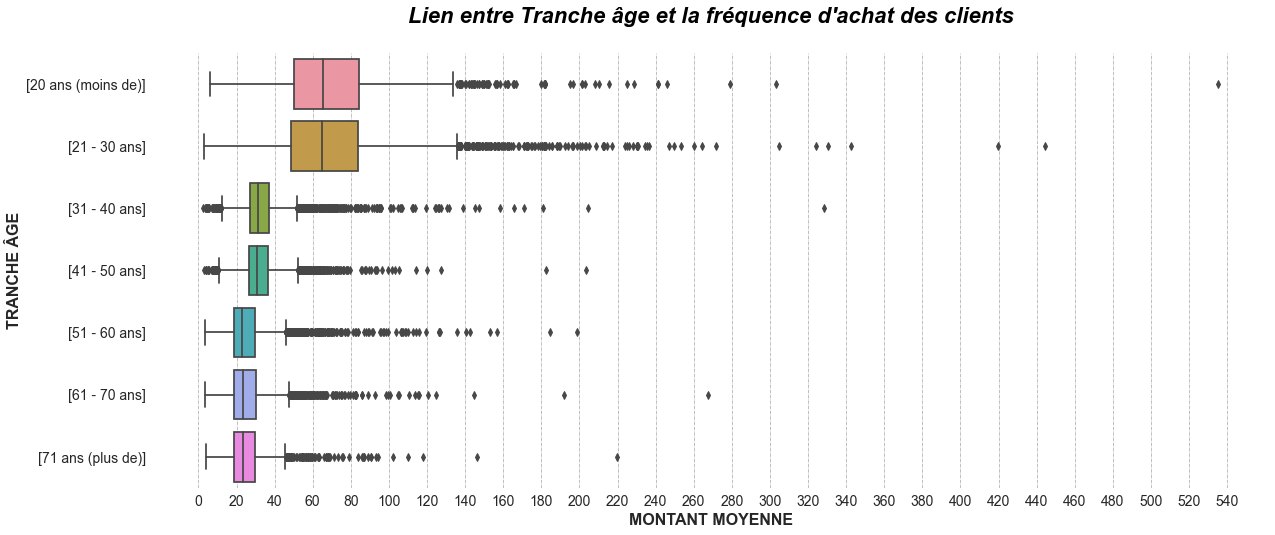

In [113]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (20, 8))
ax.set_title("Lien entre Tranche âge et la fréquence d'achat des clients",
 fontsize=22, weight='bold',color='Black',style='italic',loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')

ax = sns.boxplot(y='Tranche âge', x='Montant Moyenne', data=age_panier_moyen, orient="h")

plt.ylabel("TRANCHE ÂGE",weight='bold',size=16)
plt.xlabel("MONTANT MOYENNE",weight='bold',size=16)
plt.xticks(np.arange(0, 560, 20), fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## <center><span style="color : #32CD32">**LE LIEN ENTRE L'ÂGE DES CLIENTS ET LES CATÉGORIES DE LIVRES ACHETÉS**</span>

In [114]:
client_catégorie_produits = dataframe_Final.groupby(['Date','Id de session', 'Id du client', 'Catégorie', 'Âge', 'Tranche âge'])['Prix du produit'].sum().reset_index(name='Montant Total')
client_catégorie_produits = client_catégorie_produits.sort_values(['Id du client','Âge'], ascending=True)
client_catégorie_produits.head(20)

,Date,Id de session,Id du client,Catégorie,Âge,Tranche âge,Montant Total
60234,2021-06-11,s_47346,c_1,0,66,[61 - 70 ans],19.53
83326,2021-07-21,s_65433,c_1,0,66,[61 - 70 ans],11.99
85251,2021-07-25,s_66947,c_1,0,66,[61 - 70 ans],12.30
85917,2021-07-26,s_67467,c_1,0,66,[61 - 70 ans],18.94
86297,2021-07-27,s_67769,c_1,0,66,[61 - 70 ans],11.99
101351,2021-08-23,s_79696,c_1,0,66,[61 - 70 ans],13.96
109362,2021-09-06,s_85977,c_1,0,66,[61 - 70 ans],10.99
110327,2021-09-08,s_86739,c_1,0,66,[61 - 70 ans],8.99
127476,2021-11-04,s_114737,c_1,0,66,[61 - 70 ans],37.75
127477,2021-11-04,s_114737,c_1,2,66,[61 - 70 ans],54.87


In [115]:
age_catégorie_achat = client_catégorie_produits.groupby(['Id du client', 'Catégorie', 'Âge', 'Tranche âge'])['Id de session'].count().reset_index(name='Quantité de produits')
#age_catégorie_achat.sort_values(['Id du client','Âge'], ascending=(True,True)).head(20)
age_catégorie_achat.sort_values(['Quantité de produits','Id du client'], ascending=(False,True))

,Id du client,Catégorie,Âge,Tranche âge,Quantité de produits
3972,c_1609,0,42,[41 - 50 ans],4855
3971,c_1609,0,41,[41 - 50 ans],3714
3975,c_1609,1,42,[41 - 50 ans],2485
15892,c_3454,1,53,[51 - 60 ans],1835
3974,c_1609,1,41,[41 - 50 ans],1760
...,...,...,...,...,...
50320,c_994,2,21,[21 - 30 ans],1
50326,c_996,0,53,[51 - 60 ans],1
50335,c_997,1,29,[21 - 30 ans],1
50338,c_998,0,20,[20 ans (moins de)],1


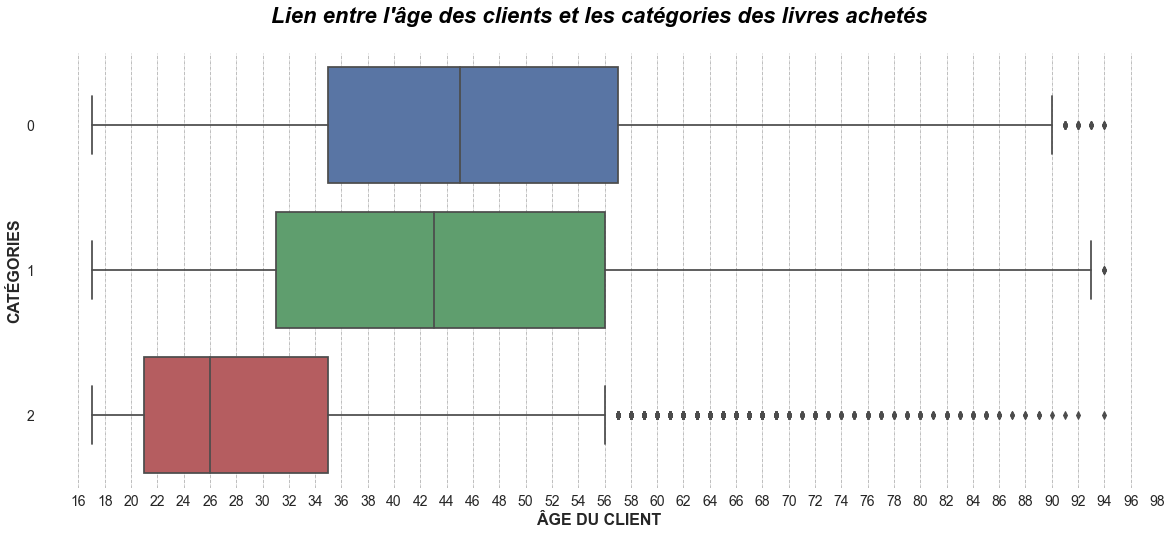

In [116]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (20, 8))
ax.set_title("Lien entre l'âge des clients et les catégories des livres achetés",
 fontsize=22, weight='bold',color='Black',style='italic',loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')

ax = sns.boxplot(y='Catégorie', x='Âge', data=age_catégorie_achat, orient="h")

plt.ylabel("CATÉGORIES",weight='bold',size=16)
plt.xlabel("ÂGE DU CLIENT",weight='bold',size=16)
plt.xticks(np.arange(16, 100, 2), fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [117]:
dataframe_Final

,Id de session,Date de la transaction,Date,Temps,Id du client,Année de naissance,Âge,Tranche âge,Sexe,Id du produit,Catégorie,Prix du produit
0,s_211425,2022-05-20 13:21:29.043970,2022-05-20,2022-05,c_103,1986,36,[31 - 40 ans],f,0_1518,0,4.18
1,s_158752,2022-02-02 07:55:19.149409,2022-02-02,2022-02,c_8534,1988,34,[31 - 40 ans],m,1_251,1,15.99
2,s_225667,2022-06-18 15:44:33.155329,2022-06-18,2022-06,c_6714,1968,54,[51 - 60 ans],f,0_1277,0,7.99
3,s_52962,2021-06-24 04:19:29.835891,2021-06-24,2021-06,c_6941,2000,21,[21 - 30 ans],m,2_209,2,69.99
4,s_325227,2023-01-11 08:22:08.194479,2023-01-11,2023-01,c_4232,1980,43,[41 - 50 ans],m,0_1509,0,4.99
...,...,...,...,...,...,...,...,...,...,...,...,...
679327,s_150195,2022-01-15 13:05:06.246925,2022-01-15,2022-01,c_8489,1951,71,[71 ans (plus de)],f,0_1551,0,12.99
679328,s_181434,2022-03-19 16:03:23.429229,2022-03-19,2022-03,c_4370,1977,45,[41 - 50 ans],f,1_639,1,10.99
679329,s_314704,2022-12-20 04:33:37.584749,2022-12-20,2022-12,c_304,1988,34,[31 - 40 ans],f,0_1425,0,12.99
679330,s_63204,2021-07-16 20:36:35.350579,2021-07-16,2021-07,c_2227,1986,35,[31 - 40 ans],m,0_1994,0,4.98


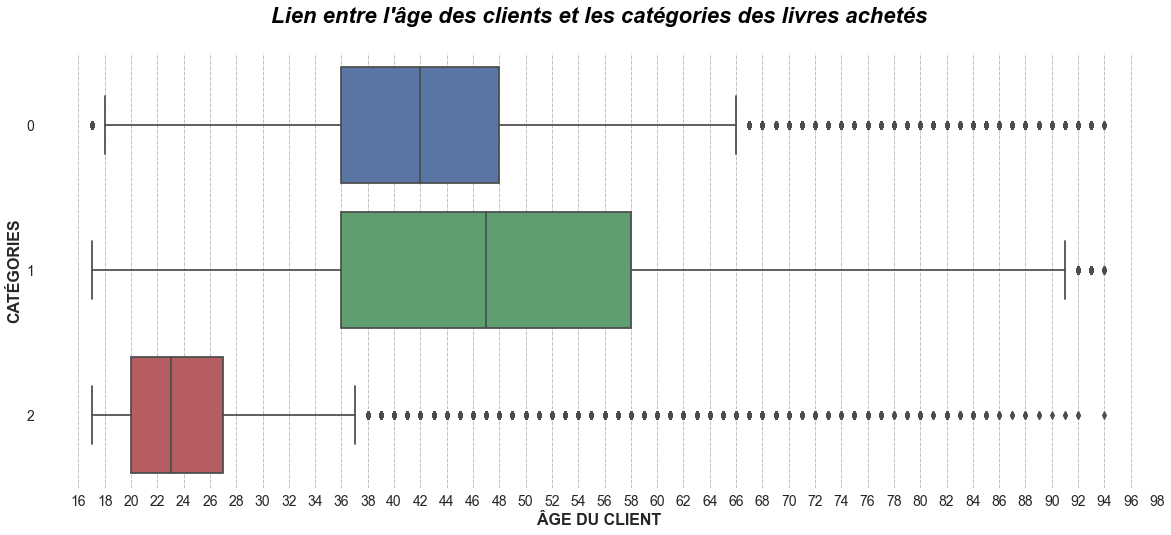

In [118]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (20, 8))
ax.set_title("Lien entre l'âge des clients et les catégories des livres achetés",
 fontsize=22, weight='bold',color='Black',style='italic',loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')

ax = sns.boxplot(y='Catégorie', x='Âge', data=dataframe_Final, orient="h")
#ax =# sns.swarmplot(x='Catégorie', y='Âge', data=dataframe_Final, color='black', alpha = 0.5, ax=ax);

plt.ylabel("CATÉGORIES",weight='bold',size=16)
plt.xlabel("ÂGE DU CLIENT",weight='bold',size=16)
plt.xticks(np.arange(16, 100, 2), fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [286]:
dataframe_Final.groupby('Catégorie').size()

Catégorie
0    396911
1    225503
2     35312
dtype: int64

In [121]:
age_catégorie_achat.groupby(['Âge', 'Catégorie'])['Quantité de produits'].agg(['mean', 'std'])

mean        std
Âge Catégorie                      
17  0           1.975089   1.291214
    1           3.877698   2.357865
    2           4.600000   3.114075
18  0           2.765766   1.984678
    1           5.242991   3.484694
...                  ...        ...
93  0           7.600000   8.443933
    1          10.666667  12.027746
94  0           2.333333   1.527525
    1           2.333333   1.154701
    2           1.000000        NaN

[233 rows x 2 columns]

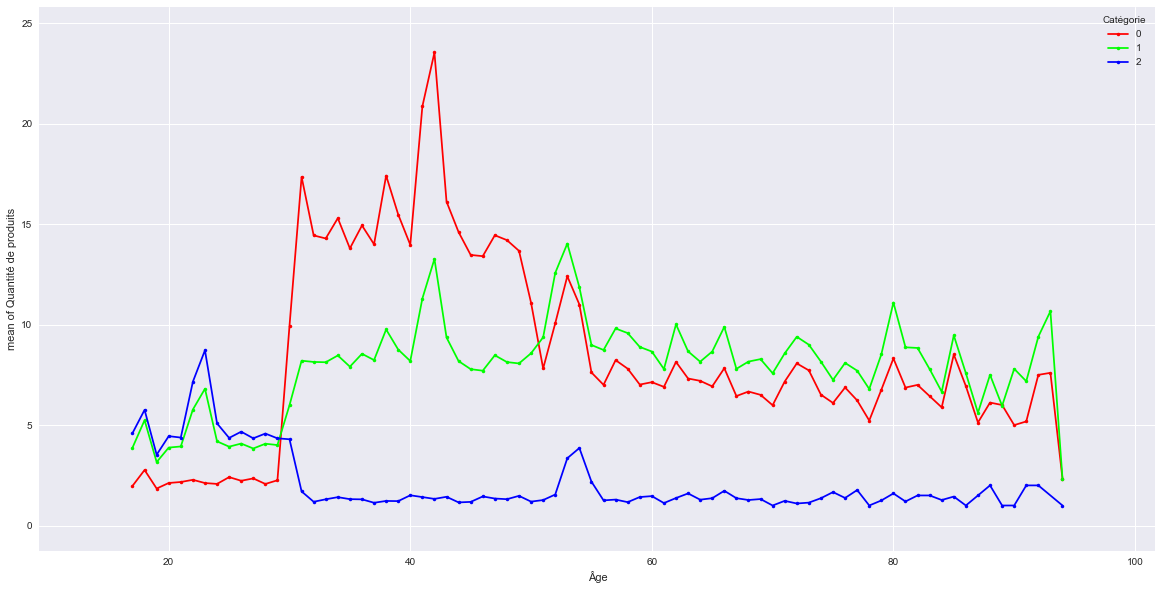

In [129]:
from statsmodels.graphics.factorplots import interaction_plot
fig, ax = plt.subplots(figsize=(20, 10))
fig = interaction_plot(
    x        = age_catégorie_achat.Âge,
    trace    = age_catégorie_achat.Catégorie,
    response = age_catégorie_achat['Quantité de produits'],
    ax       = ax,)

In [135]:
import pingouin as pg
pg.anova(data = age_catégorie_achat, dv       = 'Quantité de produits', between  = ['Catégorie', 'Âge'], detailed = True).round(4)

ImportError: cannot import name 'Literal' from 'statsmodels.compat.python' (C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\python.py)

In [98]:
#Ancien
produit_age_catg_test = pd.crosstab(dates_merge_final_df['Âge'], dates_merge_final_df['Catégorie'])
produit_age_catg_test

Catégorie,0,1,2
Âge,,,
17,1400,2150,2385
18,2118,3721,3797
19,1161,2027,2221
20,992,1682,1758
21,1053,1574,1679
...,...,...,...
90,92,150,1
91,95,113,2
92,68,126,2


In [99]:
produit_age_catg_test2 = dates_merge_final_df.groupby(['Âge','Catégorie'])['Prix du produit'].size().reset_index(name='Quantité Produits')
produit_age_catg_test2

,Âge,Catégorie,Quantité Produits
0,17,0,1400
1,17,1,2150
2,17,2,2385
3,18,0,2118
4,18,1,3721
...,...,...,...
228,93,0,41
229,93,1,88
230,94,0,11
231,94,1,11


In [100]:
fvalue, pvalue = stats.f_oneway(produit_age_catg_test2['Âge'][produit_age_catg_test2['Catégorie']==0],
                             produit_age_catg_test2['Âge'][produit_age_catg_test2['Catégorie']==1],
                             produit_age_catg_test2['Âge'][produit_age_catg_test2['Catégorie']==2]
                            )
print(fvalue, pvalue)
print('F-Statistic=%.3f, p=%.3f' % (fvalue, pvalue))

0.011998666944624575 0.9880736484564956
F-Statistic=0.012, p=0.988
